# Exercício 1

## 1. Import packages and Data

In [93]:
import os
import kagglehub
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

load_dotenv("./config/.env")

#supress warnings
import warnings
warnings.filterwarnings("ignore")

c:\GitHub\lista2FECD-B\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [94]:
# Download latest version
path = kagglehub.dataset_download("maajdl/yeh-concret-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bruno\.cache\kagglehub\datasets\maajdl\yeh-concret-data\versions\1


In [95]:
df = pd.read_csv(f"{path}/{os.environ["FILE_NAME"]}")
display(df)
display(df.info())
display(df.describe())

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   28  61.89  
2             594.0  270  40.27  
3             594.0  365  41.05  
4             825.5  360  44.30  
...             ...  ...    ...  
1025          768.3   28  44.28  
1026          813.4   28  31.18  
1027          780.0   28  23.70  
1028          788.9   28  32.77  
1029          761.5   28  32.40  

[1030 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     7.000000    23.710000  
50%         968.000000     779.500000    28.000000    34.445000  
75%        1029.400000     824.000000    56.000000    46.135000  
max        1145.000000     992.600000   365.000000    82.600000

## 2. Initial EDA and Distributions

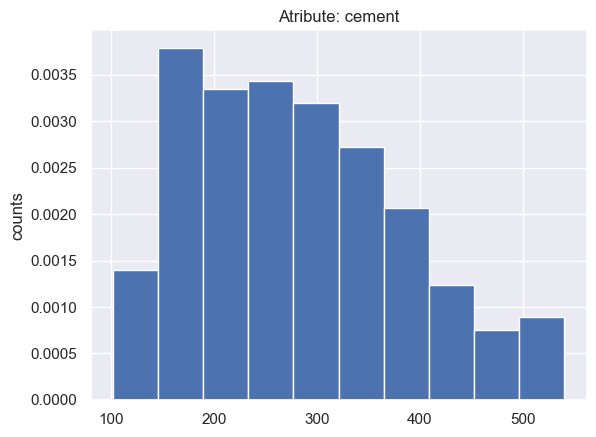

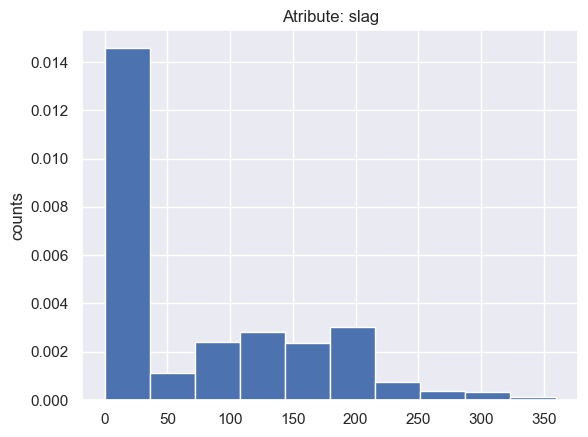

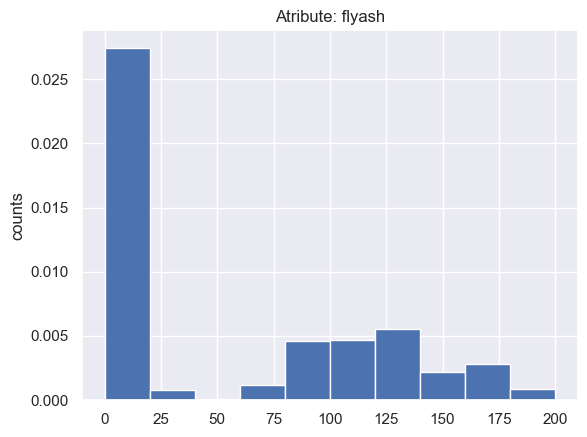

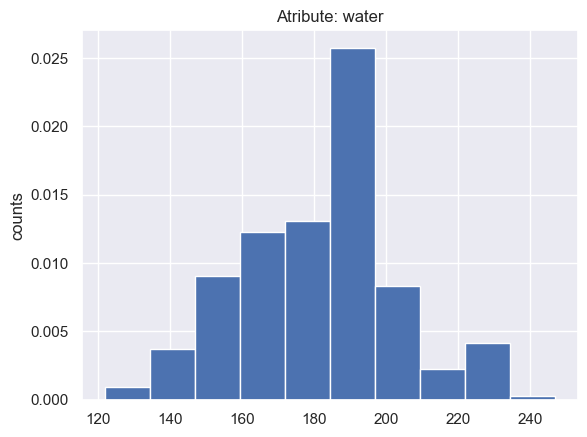

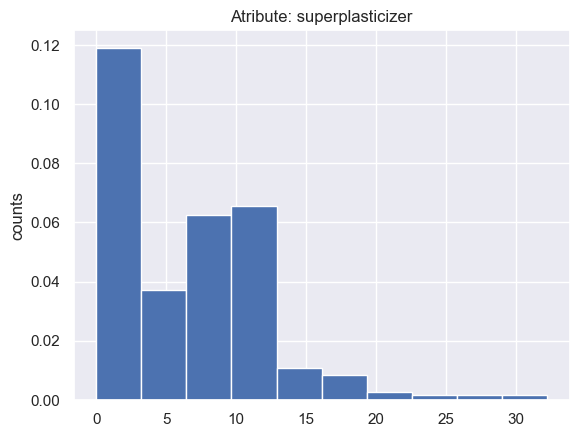

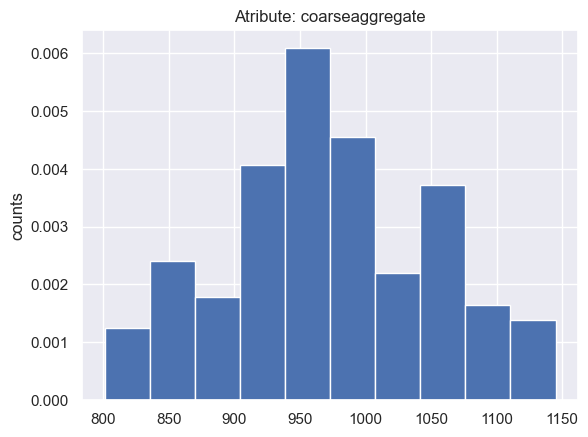

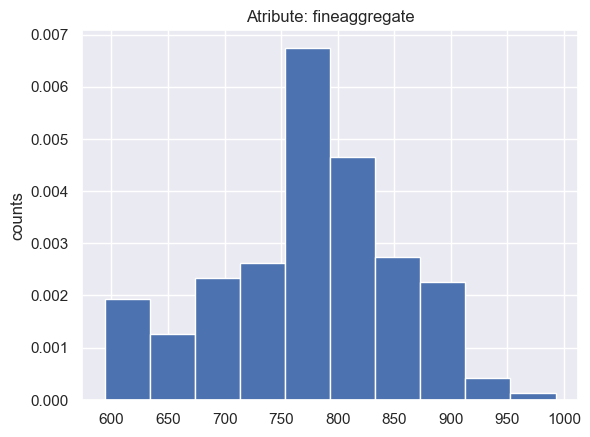

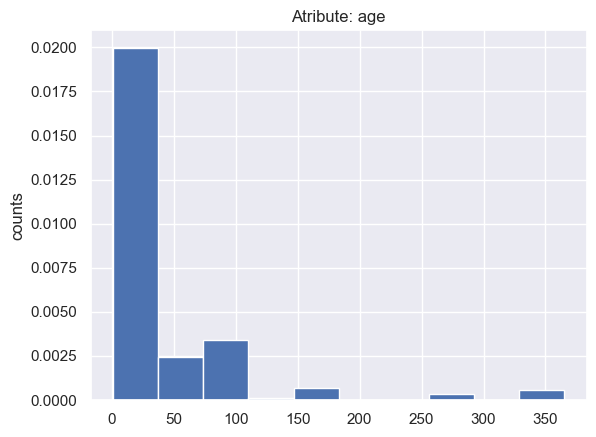

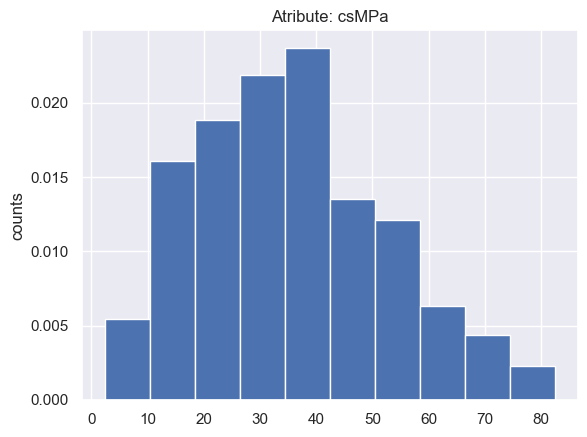

In [96]:
#look at data distribution
for column in df.columns:
    plt.hist(df[column], density=True)
    plt.title(f"Atribute: {column}")
    plt.xticks()
    plt.ylabel('counts')
    plt.show()

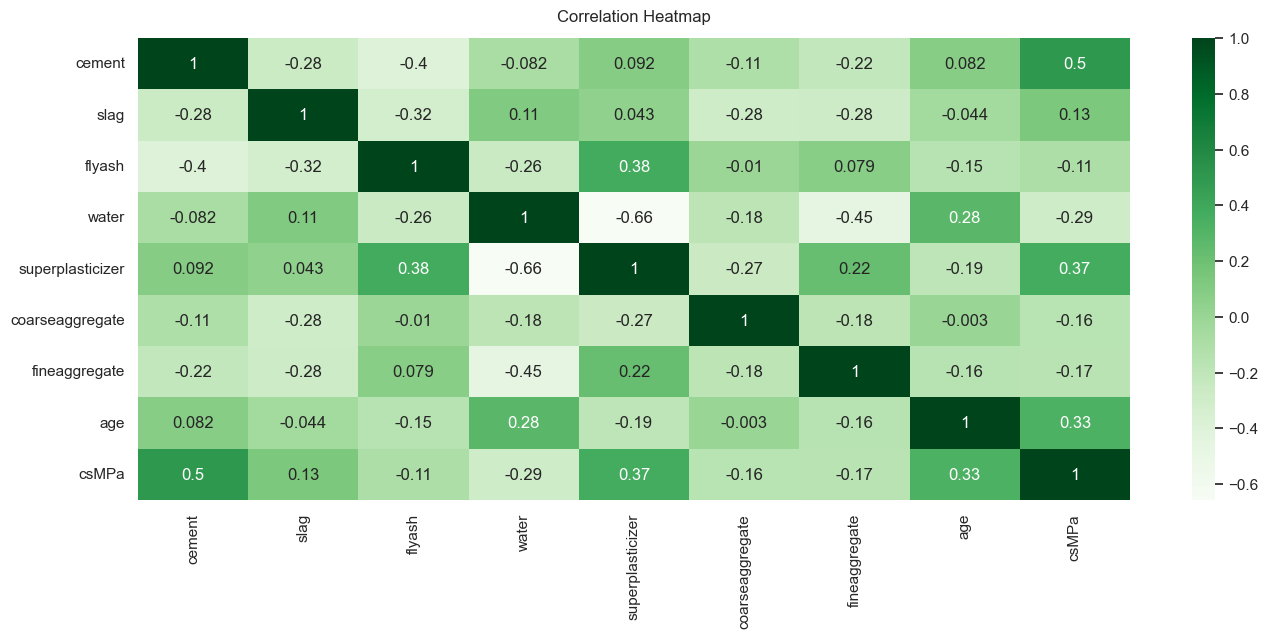

In [97]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

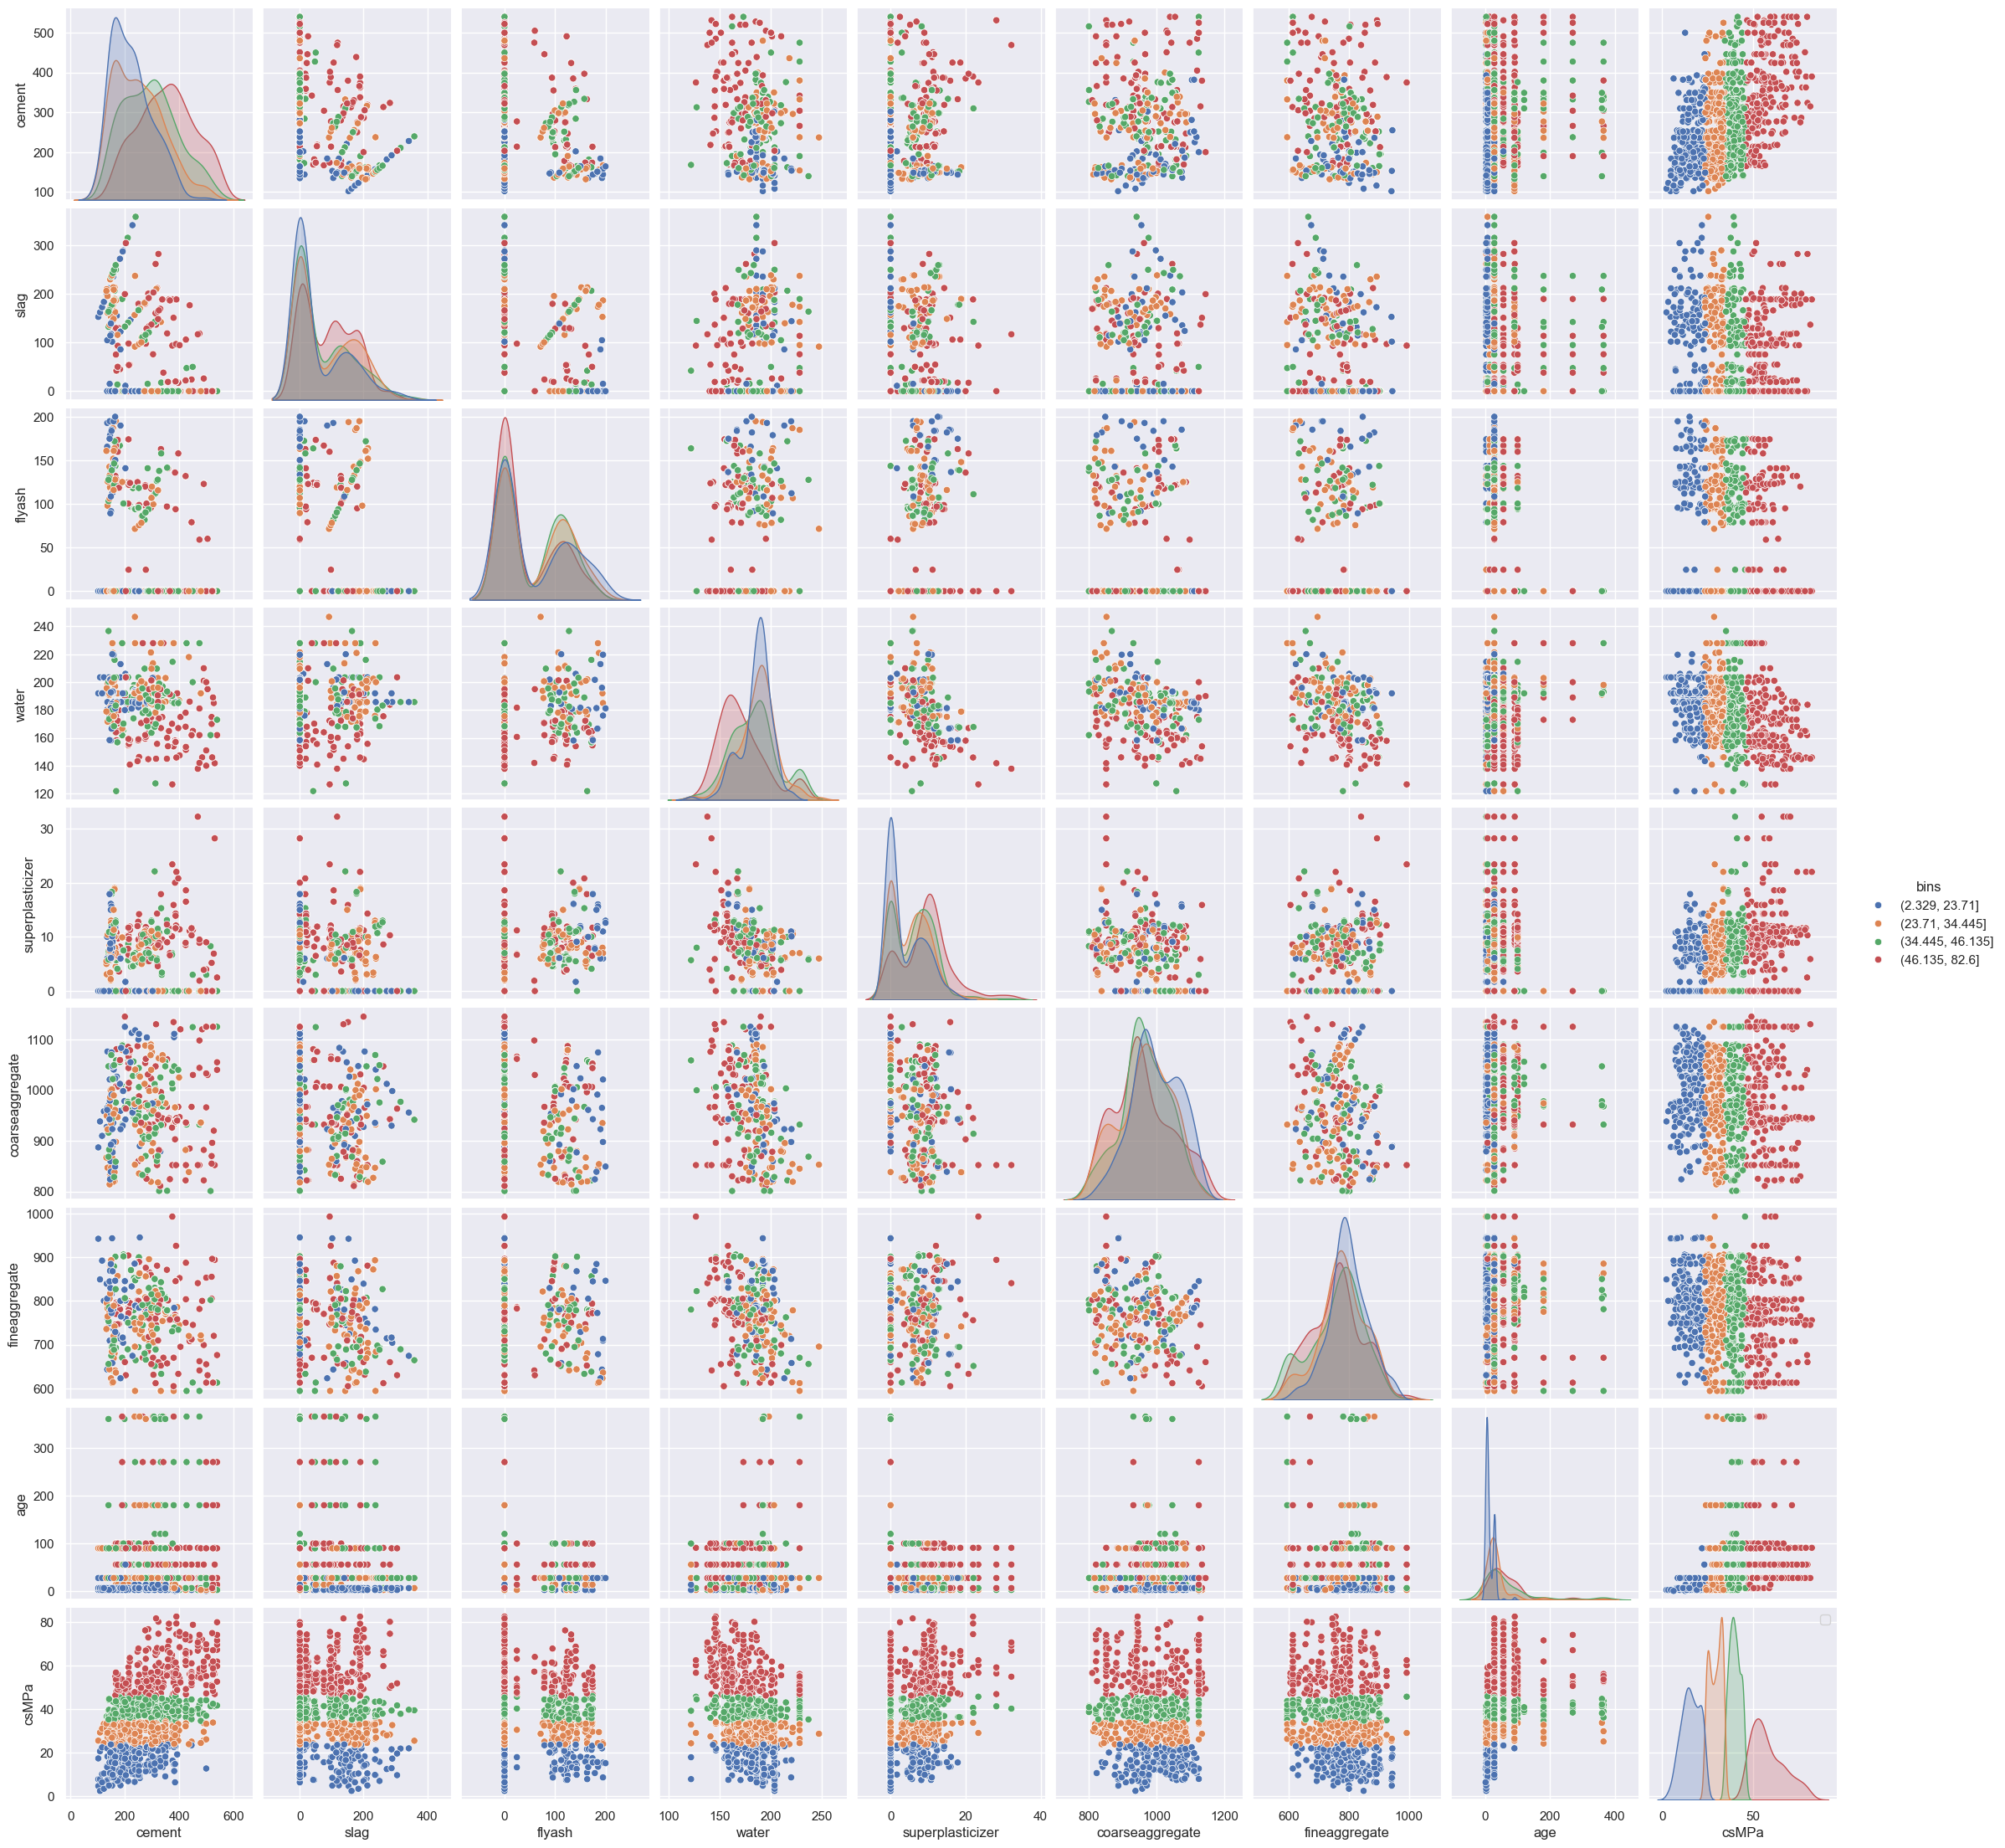

In [98]:
# Discretizar dados da coluna csMPa em intervalos de mesma largura
bins = pd.qcut(df['csMPa'], q=4)

df['bins'] = bins

# Analisar se existe uma correlação linear entre os atributos separados por classe
sns.pairplot(df.loc[:, (df.columns)], hue='bins')
plt.legend()
plt.show()

Pode-se notar que o atributo "cement" tem a melhor correlação linear com "csMPa" (o atributo alvo), os demais atributos não apresentam correlações lineares tão diretas quanto ela. Além do as classes ficam bem separadas nessa correlação linear.

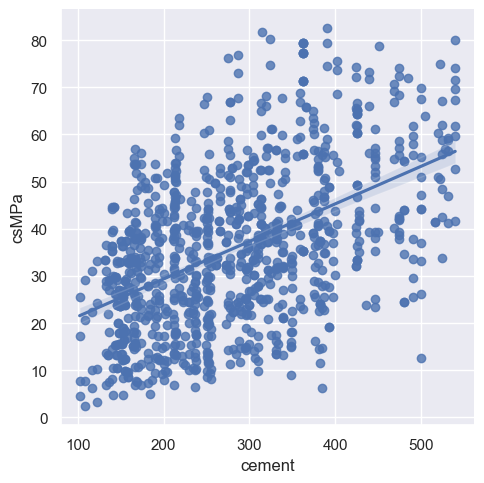

In [99]:
sns.lmplot(x='cement', y='csMPa',data=df)
plt.show()

In [100]:
df = df.drop('bins', axis=1)

X = df.copy()
Y = X.pop('csMPa')

## 3. Principal Component Analysis

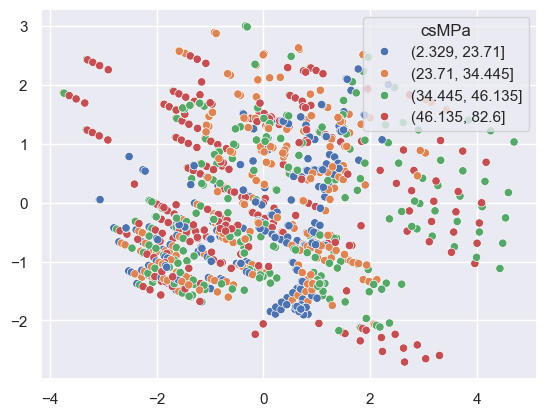

In [101]:
X_for_PCA = X.copy()

scaler = StandardScaler()
X_for_PCA_scaled = scaler.fit_transform(X_for_PCA.values)

pca = PCA(len(X.columns))
X_pca = pca.fit_transform(X_for_PCA_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

sns.scatterplot(x=X_pca["PC1"].values, y=X_pca["PC2"].values, hue=bins)
plt.show()

In [102]:
print(pca.components_)

[[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [ 0.054297    0.36269932 -0.2267512  -0.29606003  0.03727351  0.54580513
  -0.38528206 -0.52791909]
 [-0.14820612  0.02093167 -0.54963115 -0.07022191 -0.35461841  0.03308317
   0.70123743 -0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [-0.22184381 -0.22836331 -0.35246257  0.52427468  0.66464314  0.22684015
   0.03902583 -0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]


Os loadings(cargas) medem o quanto cada atributo original contribui para cada PC. Mais especificamente, cada linha do dataframe de loadings abaixo é o cosseno do ângulo entre a atributo original e os PCs. Eles representam a correlação entre os atributos originais e os PCs.

In [103]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns,
)
display(loadings)

PC1       PC2       PC3       PC4       PC5       PC6  \
cement            0.098401 -0.113737  0.814202  0.054297 -0.148206 -0.203142   
slag              0.177262  0.686053 -0.171794  0.362699  0.020932  0.304882   
flyash           -0.394662 -0.142948 -0.408221 -0.226751 -0.549631 -0.183267   
water             0.547004  0.053256 -0.213190 -0.296060 -0.070222 -0.365970   
superplasticizer -0.505945  0.282930  0.234597  0.037274 -0.354618  0.193294   
coarseaggregate   0.037928 -0.629943 -0.174088  0.545805  0.033083  0.314559   
fineaggregate    -0.401926 -0.019391 -0.004569 -0.385282  0.701237  0.092466   
age               0.291479 -0.125981  0.100521 -0.527919 -0.228010  0.743908   

                       PC7       PC8  
cement           -0.221844  0.446163  
slag             -0.228363  0.437384  
flyash           -0.352463  0.381886  
water             0.524275  0.388741  
superplasticizer  0.664643  0.051750  
coarseaggregate   0.226840  0.349320  
fineaggregate     0.039026  0.433370  
age              -0.069367  0.012881

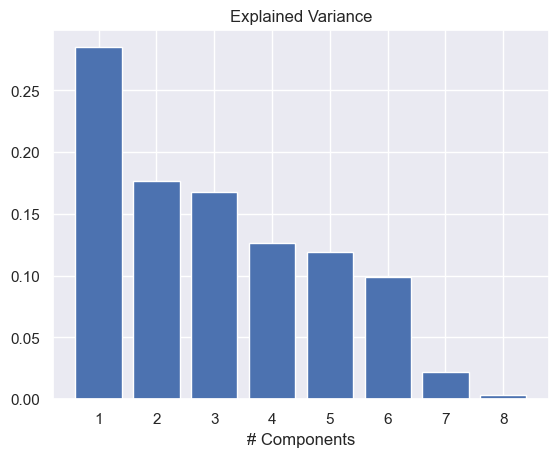

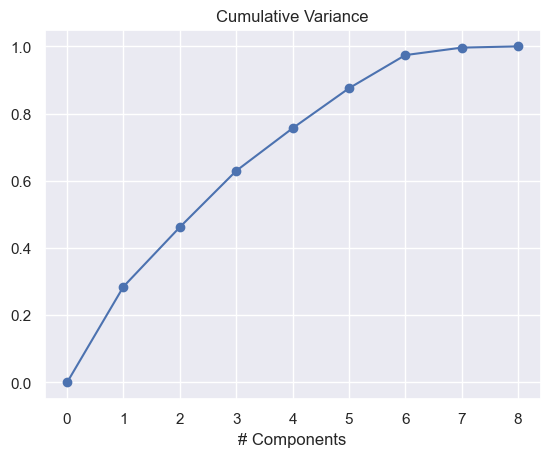

In [104]:
grid = np.arange(1, pca.n_components_+1)
explained_var_ratio = pca.explained_variance_ratio_

plt.figure()
plt.title("Explained Variance")
plt.xlabel("# Components")
plt.bar(grid, explained_var_ratio)
plt.show()

plt.figure()
plt.plot(np.r_[0, grid], np.r_[0, np.cumsum(explained_var_ratio)], "o-")
plt.title("Cumulative Variance")
plt.xlabel("# Components")
plt.show()

## 4. OLS (Ordinary Least Squares) Regression Analysis

In [105]:
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          6.29e-206
Time:                        23:08:15   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586  

**Questão 1: Há alguma relação entre os preditores (age e ingredientes) e a variável aleatória (`compressive strength`)?**

**Hipótese nula (H0): Coeficientes para cada preditor é zero**

A Estatística-F (F-statistic) igual a 204.3 (204.3 >> 1) indica que há pelo menos uma variável preditora que se correlaciona com a `compressive strength`. A probabilidade da Estatística-F de 6.29e-206 indica a probabilidade da hipótese nula. Portanto existe correlação entre preditores e variável de resposta.

**Questão 2: O quão forte é a relação entre preditores e variável de resposta?**

A métrica R² indica o quanto o modelo consegue explicar a variável de resposta, ou seja, 61.6% da variância é explicada pelo modelo.

**Questão 3: Quais preditores contribuem para a `compressive strength`?**

O p-value de cada estatística-t para os preditores indica se deve-se ou não aceitar H0. Considerando um nível de significância de alpha=5% (0.05), os únicos preditores com p-value menor que alpha são `superplasticizer` e `coarseaggregate`, portanto eles não contribuem significantemente para a `compressive strength`.

**Questão 4: O quão grande é o efeito de cada preditor na `compressive strength`?**

O único atributo a apresentar coeficiente igual a zero em seu intervalo de confiança  é o `coarseaggregate`. Os demais atributos são considerados, estatisticamente, significantes. Mas, para validar se a colinearidade é o motivo do intervalo de confiança para o `coarseaggregate` chegar em zero, serão estimados os VIF scores.

In [106]:
vif_scores = []
for idx, column in enumerate(X.columns):
    vif_scores.append(variance_inflation_factor(X.values, idx))

vif_df = pd.DataFrame({"feature": X.columns, "vif": vif_scores})
display(vif_df)

feature        vif
0            cement  15.456717
1              slag   3.329127
2            flyash   4.147833
3             water  82.157569
4  superplasticizer   5.471094
5   coarseaggregate  84.955779
6     fineaggregate  72.790995
7               age   1.699459

**O VIF score com valores entre 5 e 10 indicam colinearidade, onde 1 é a colinearidade mínima.**

Os atributos `water` e `cement` exibem uma multicolinearidade. `Superplasticizer` está no range entre 5 e 10, portanto, sendo conservativo, ele demonstra colinearidade. Portanto, não evidências o suficiente para apontar que `coarseaggregate` não é estatisticamente insignificante, afinal, seu intervalo de confiança largo pode ter chegado em zero devida a multicolinearidade.

Portanto, é possível estudar a associação de cada preditor com a `compressive strength`, executando um OLS para cada atributo preditor:

In [107]:
for column in X.columns:
    X_sm = sm.add_constant(X[column])
    model = sm.OLS(Y, X_sm)
    
    text = f"\33[44m Atribute: {column} \33[0m" 
    print(text.center(90))
    print(model.fit().summary())

                                Atribute: cement                                 
                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     338.7
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.32e-65
Time:                        23:08:15   Log-Likelihood:                -4214.6
No. Observations:                1030   AIC:                             8433.
Df Residuals:                    1028   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Observando o p-value da estatística-t, todos os atributos apresentam uma associação forte com a variável de resposta `compressive strength`. Sendo que `flyash` é a mais fraca entre elas e apresenta um p-value de 0.001

**Questão 5:** Qual a acurácia desse modelo para prever a `compressive strength`?

Essa acurácia vai depender do tipo de predição:
1. Resposta individual (Y = f(X) + ep), o intervalo de predição é usado
2. Resposta média (f(X)), o intervalo de confiança é usado

O intervalo de predição (2) são mais largos que os intervalos de confiança (1), isso se dá, pois são levados em conta as incertezas associadas ao erro irredutível (ep)

**Questão 6:** A relação é linear?

A não-linearidade pode ser determinada pelo plot do `resíduo vs valor predito` para cada atributo (plots do canto superior direito). Quando existe linearidade, deve haver um padrão bem claro. O plot do resíduo com a forma mais não-linear é quando o atributo `age` está entre 0 e 20, onde há resíduos negativos, aumentando de 20 até 100 até decaírem novamente. `water` e `fineaggregate` têm padrões levemente não-lineares. Transformações dos preditores (por exemplo: sqrt(X); X^2) podem acomodar as não-linearidades.

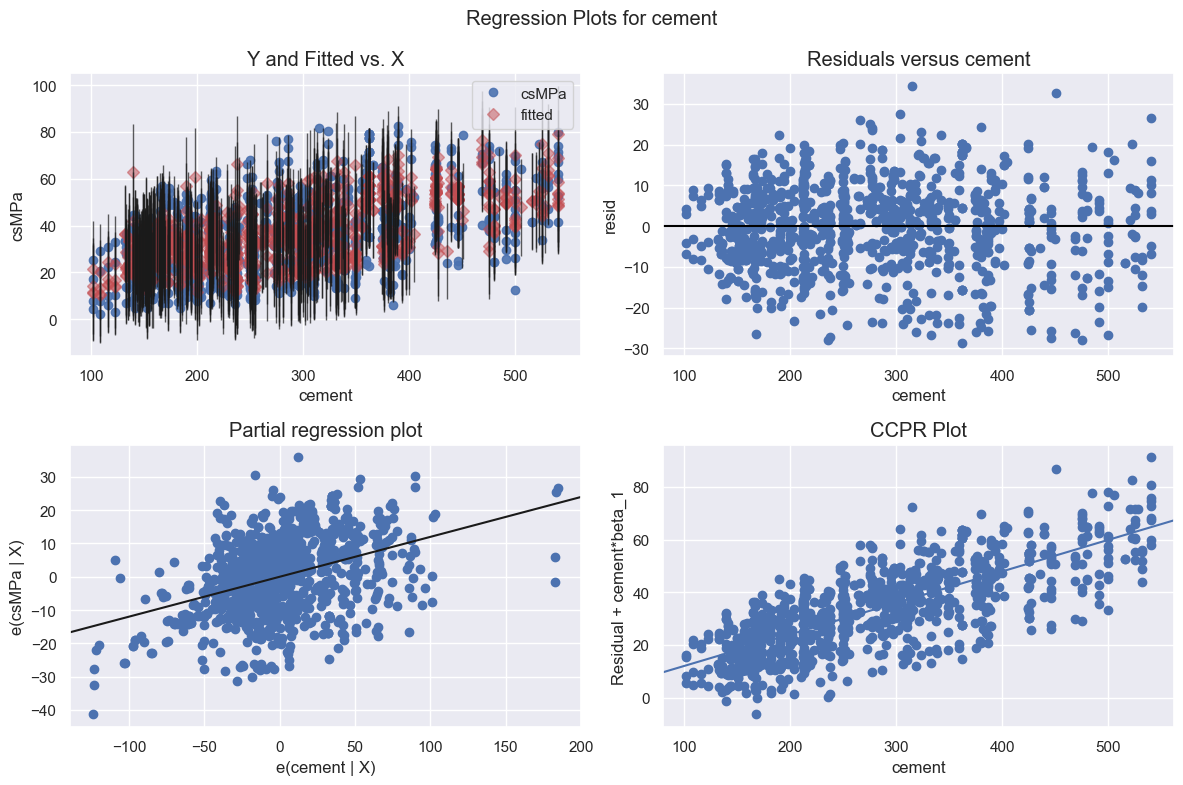

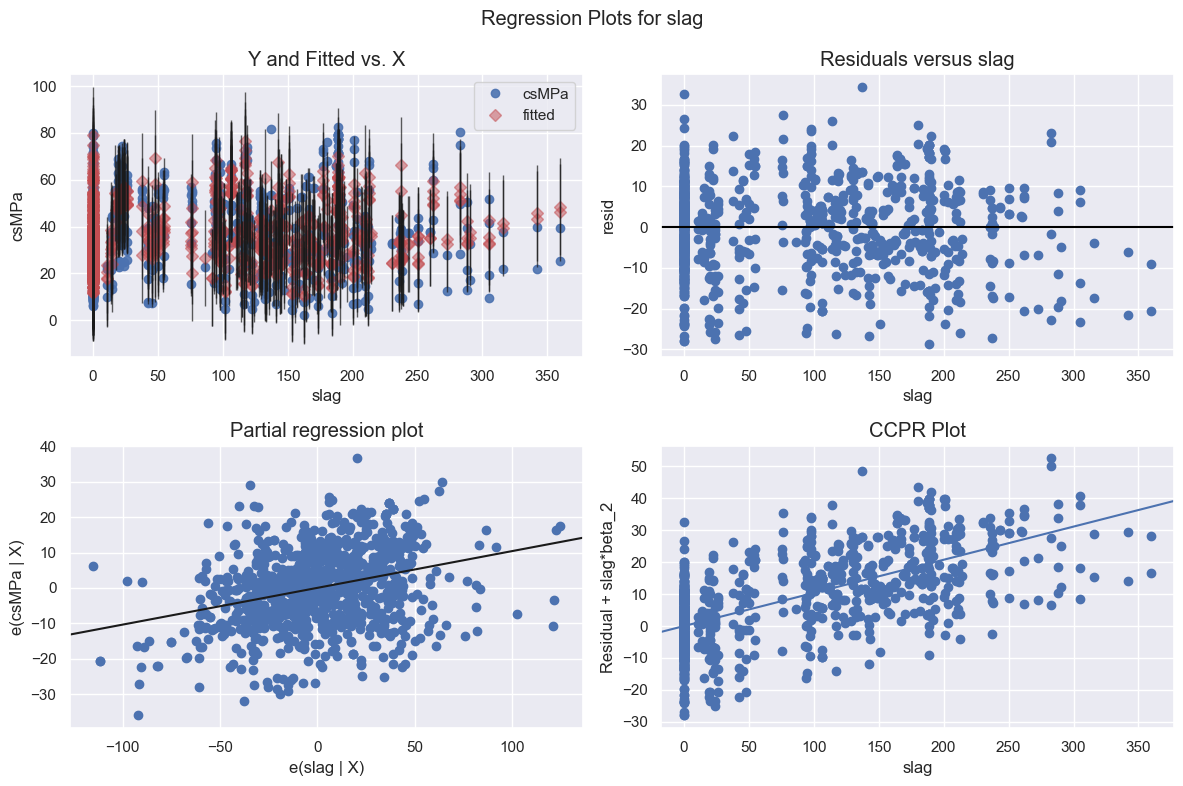

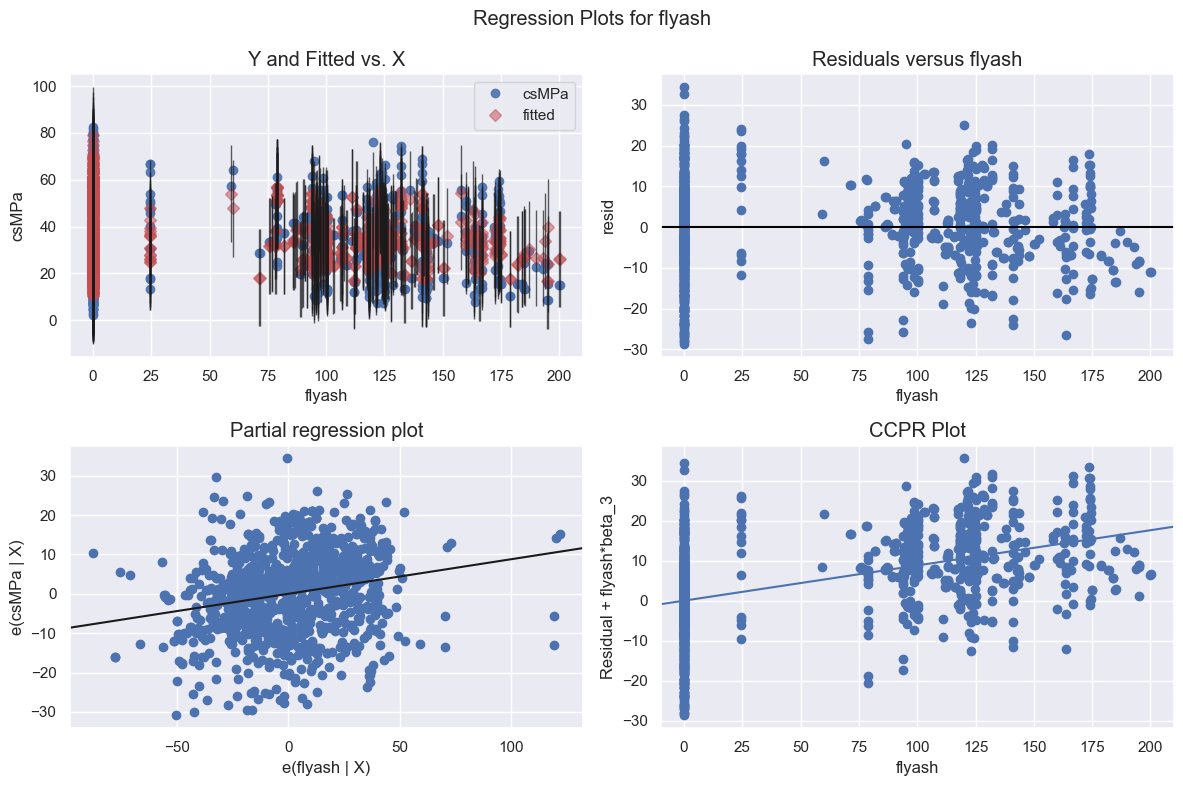

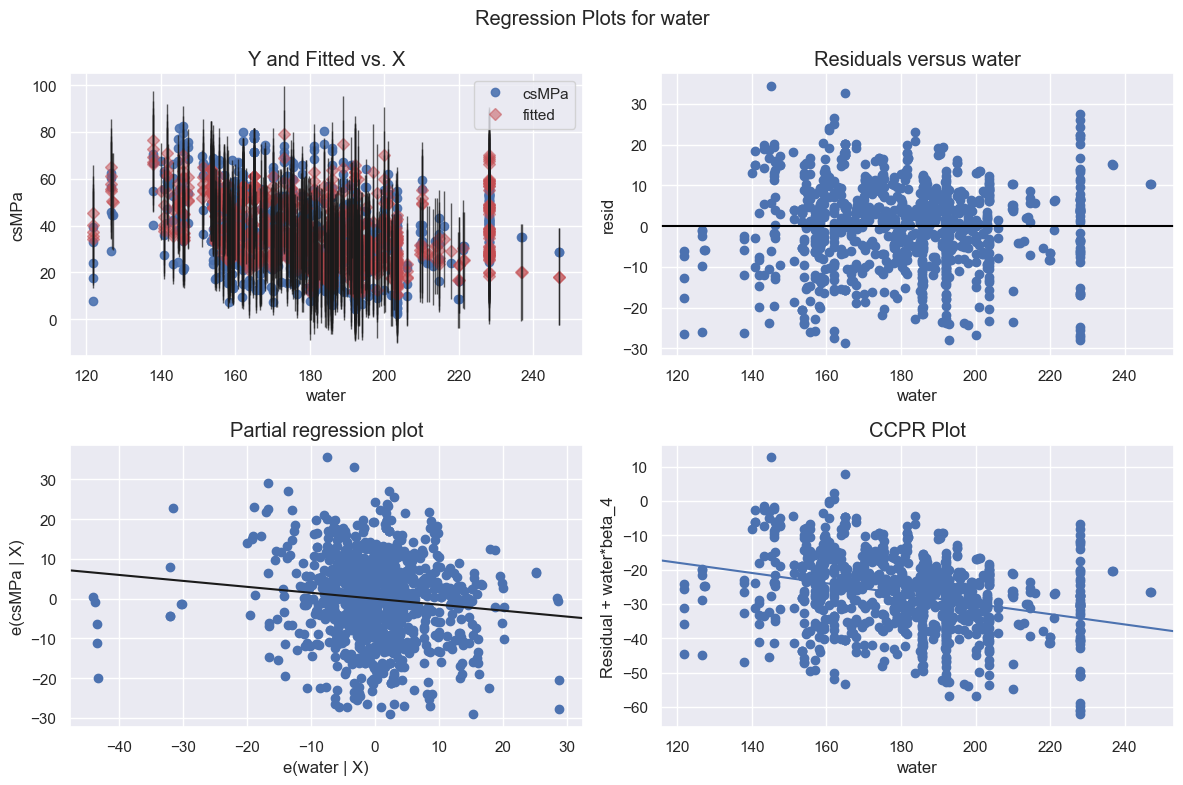

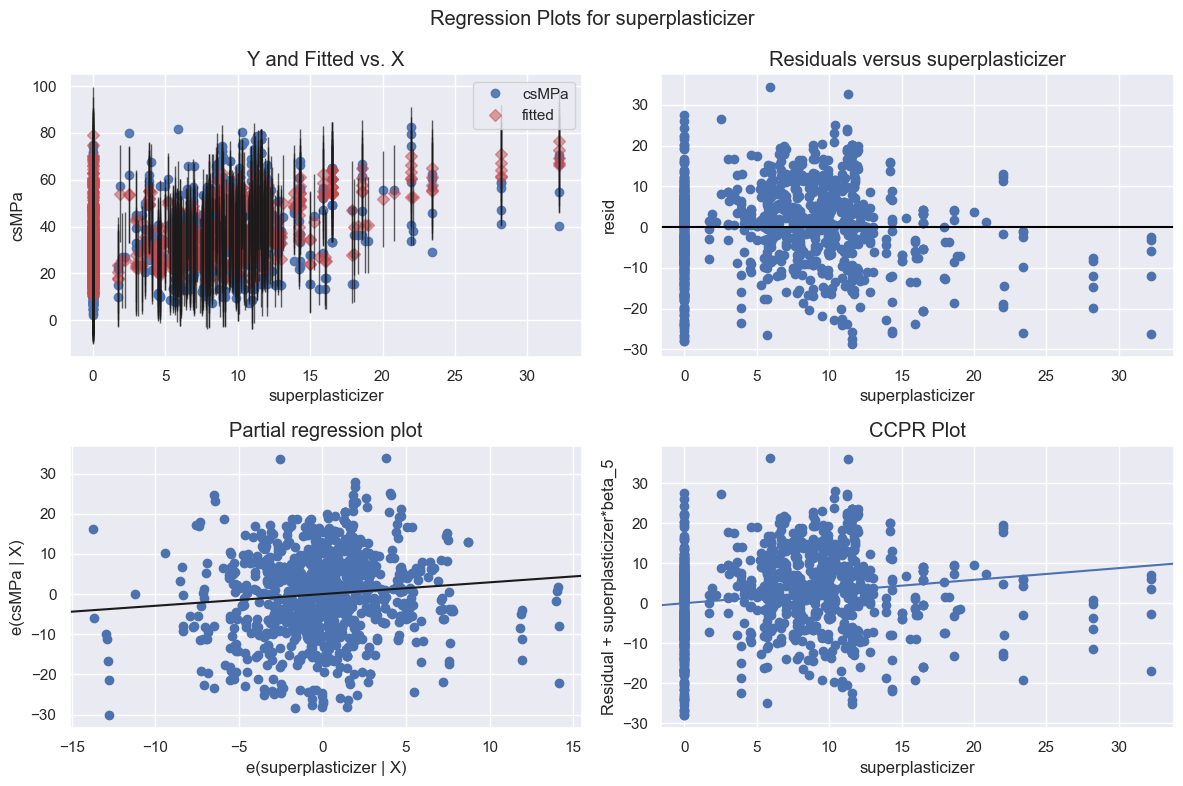

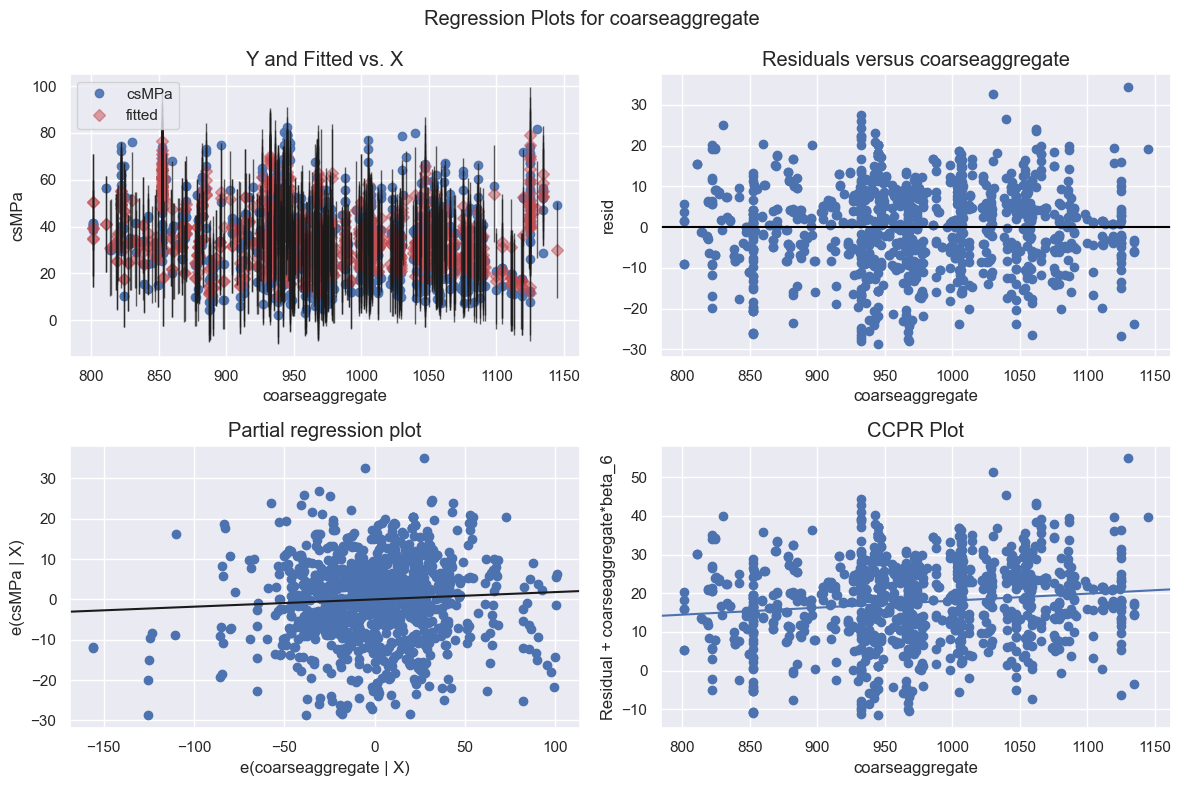

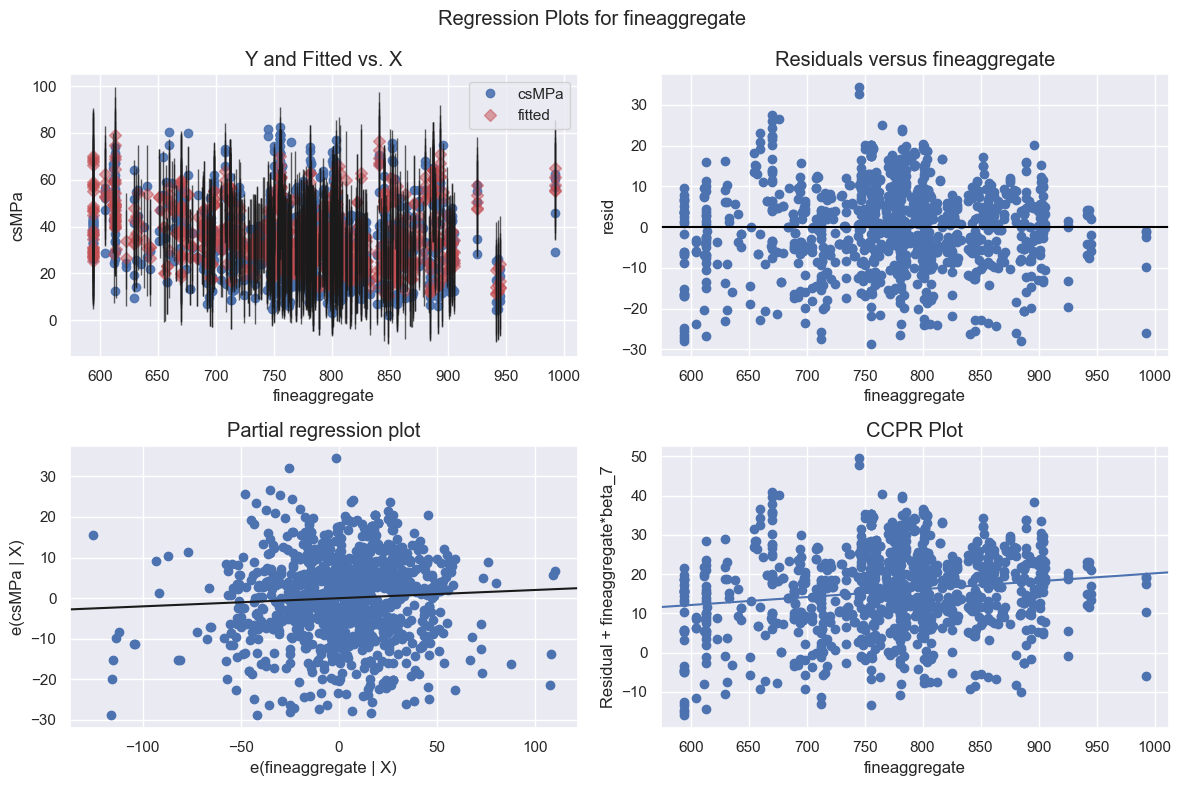

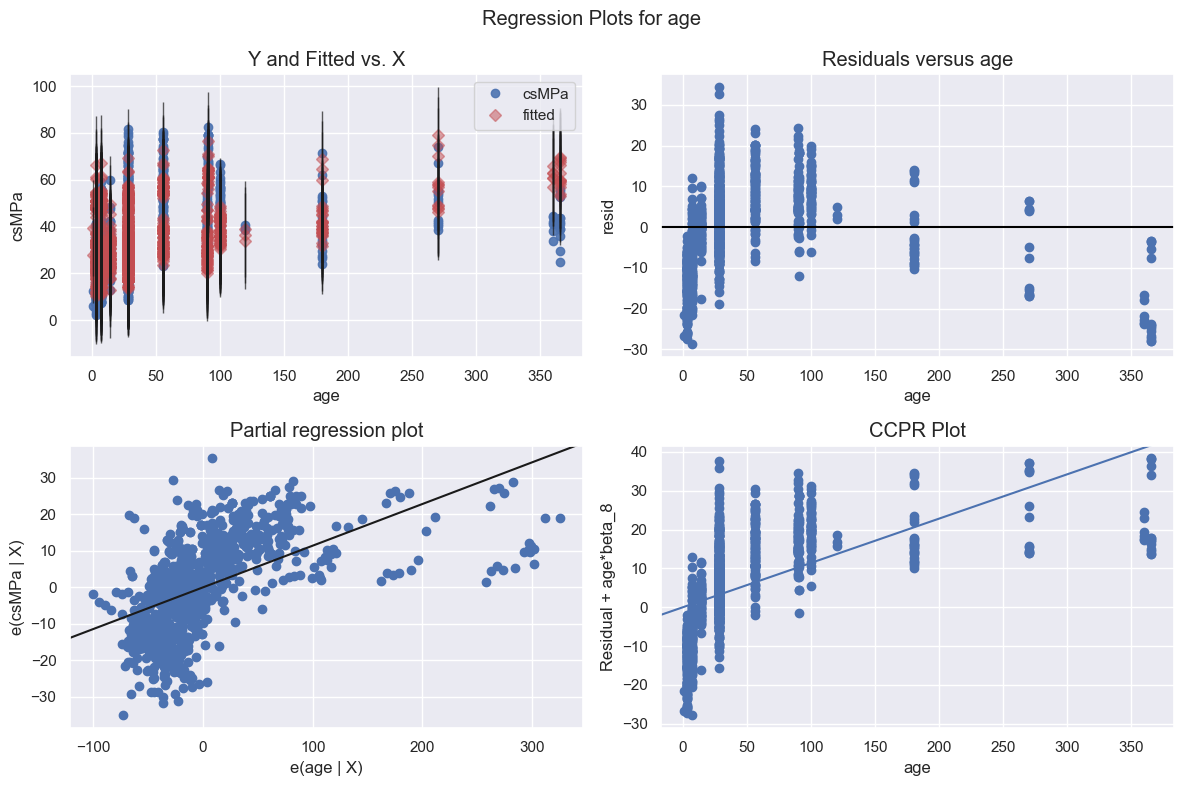

In [108]:
model = ols('csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age', data=df).fit()

for column in X.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig.show()

## 5. Engenharia de Features com OLS

**Questão 7:** Há alguma sinergia entre preditores?

Para responder a essa pergunta, um termo de interação precisa ser criado para acomodar relações não-aditivadas, e o valor R² deve aumentar com essa inclusão. A seguir foi criada um termo de interação para `water` e `cement`, criando o `water : cement ration` e executado a análise OLS novamente. Com a adição desse termo o valor do R² aumentou de 0.616 para 0.618. Já que adicionar atributos aumenta o R² automaticamente, um aumento de 0.002 não é muito expressivo, seria melhor observar o adjusted R² que penaliza adição de atributos preditores. O adjusted R² aumentou de 0.613 para 0.615, indicando uma sinergia entre esses preditores. Similarmente, o AIC e BIC penalizam a adição de atributos preditores, mas o AIC melhorou, indo de 7756 para 7750 e o BIC ficou igual. Reforçando o argumento da adição do `water : cement ratio` ser justificada.

O melhor método para julgar a inclusão do `water : cement ratio` é estimando o conjunto de teste pela validação cruzada, mas dado a não-linearidade da variável de resposta (`compressive strength`) para os preditores, regressão linear não irá funcionar, já que outros modelos não-lineares irão produzir resultados com melhores predições. Para o propósito de inferências, adjusted R², AIC e BIC serão suficientes.

In [109]:
X["water_cement_ratio"] = X["water"] / X["cement"]
display(X)

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  water_cement_ratio  
0             676.0   28            0.300000  
1             676.0   28            0.300000  
2             594.0  270            0.685714  
3             594.0  365            0.685714  
4             825.5  360            0.966767  
...             ...  ...                 ...  
1025          768.3   28            0.649783  
1026          813.4   28            0.608318  
1027          780.0   28            1.297643  
1028          788.9   28            1.103708  
1029          761.5   28            0.768877  

[1030 rows x 9 columns]

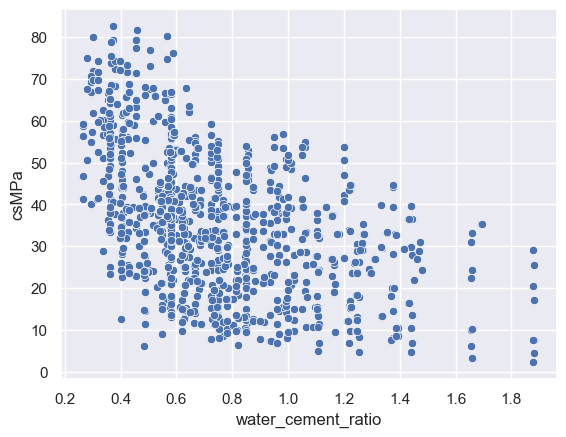

In [110]:
plt.figure()
sns.scatterplot(x=X["water_cement_ratio"], y=Y)
plt.show()

In [111]:
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     183.6
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          2.28e-206
Time:                        23:08:21   Log-Likelihood:                -3865.2
No. Observations:                1030   AIC:                             7750.
Df Residuals:                    1020   BIC:                             7800.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.1769     26

In [112]:
X_sm = sm.add_constant(X["water_cement_ratio"])
model = sm.OLS(Y, X_sm)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  csMPa   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     343.9
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.86e-66
Time:                        23:08:21   Log-Likelihood:                -4212.6
No. Observations:                1030   AIC:                             8429.
Df Residuals:                    1028   BIC:                             8439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 55.7502      1

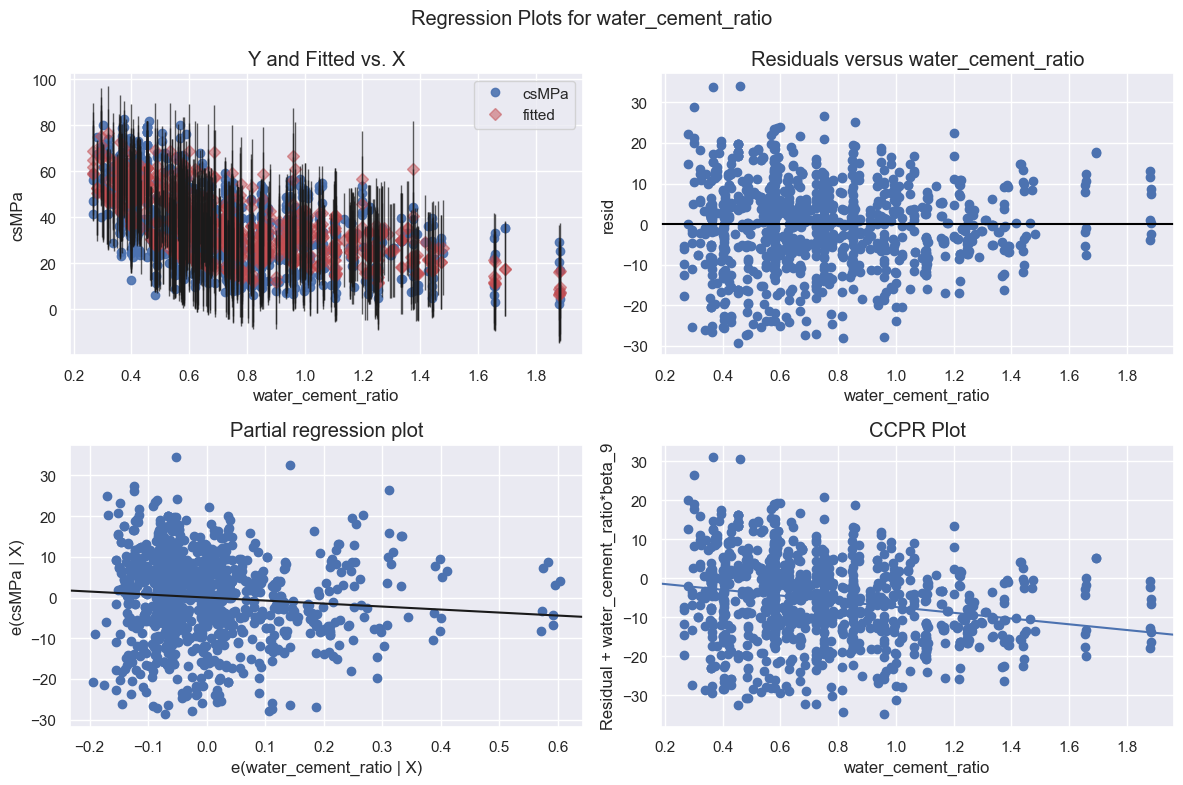

In [113]:
df["water_cement_ratio"] = X["water_cement_ratio"]
model = ols('csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age + water_cement_ratio', data=df).fit()

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "water_cement_ratio", fig=fig)
fig.show()

# Exercício 2

In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm, chi2
import seaborn as sns
import matplotlib.pyplot as plt


aptos_df = pd.read_csv('./data/aptosBH.txt', delim_whitespace=True)
circle_df = pd.read_csv("./data/DadosCirculo.csv")

## 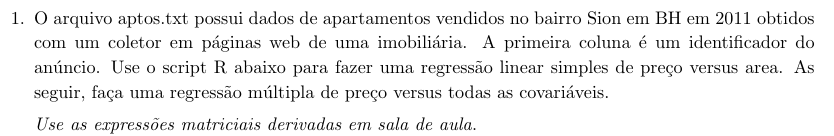

In [137]:
display(aptos_df)

ID    area  quartos  suites  vagas      preco
0    353534.0  110.00      3.0     1.0    2.0   880000.0
1    366113.0  101.89      3.0     1.0    4.0   900000.0
2    186728.0  191.00      3.0     1.0    3.0   920000.0
3    366115.0  101.89      3.0     1.0    4.0   950000.0
4    353022.0  280.61      3.0     1.0    4.0  1000000.0
..        ...     ...      ...     ...    ...        ...
216  371737.0   81.99      2.0     1.0    2.0   524892.0
217  341847.0   70.00      2.0     2.0    2.0   550000.0
218  341846.0   70.00      2.0     2.0    2.0   620000.0
219   87025.0  238.39      2.0     1.0    2.0   620000.0
220  378182.0  115.00      3.0     1.0    2.0   750000.0

[221 rows x 6 columns]

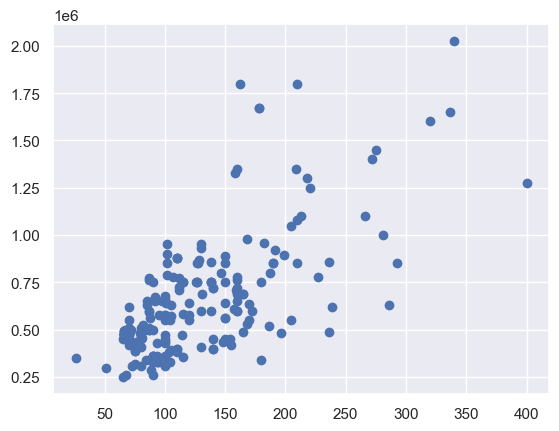

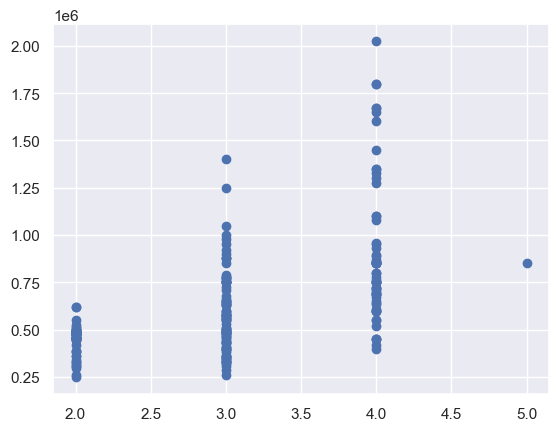

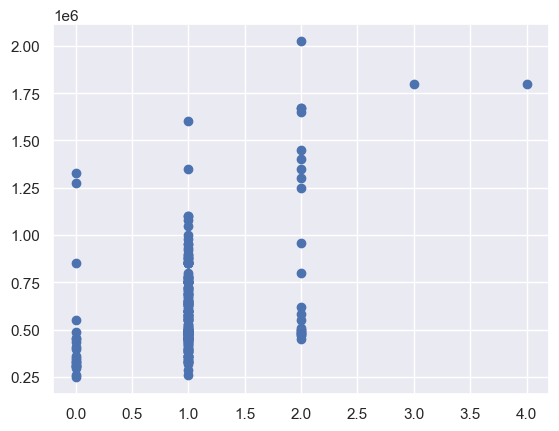

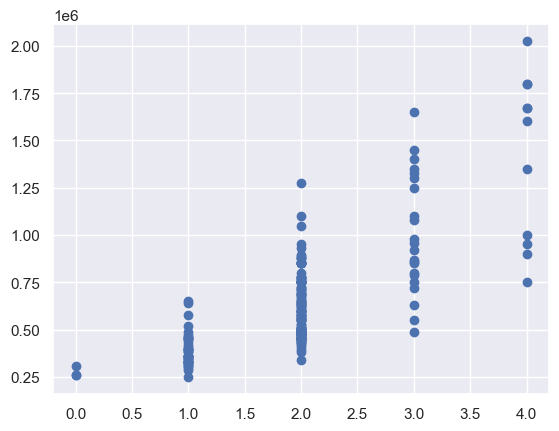

In [138]:
X = aptos_df[["area", "quartos", "suites", "vagas"]]
y = aptos_df["preco"]

for column in X.columns:
    plt.figure()
    plt.scatter(aptos_df[column], aptos_df["preco"])
    plt.show()

In [139]:
X_simple = np.column_stack((np.ones(aptos_df.shape[0]), aptos_df["area"]))
y = aptos_df["preco"].values.reshape((-1, 1))

Xt_X_1 = np.linalg.inv(X_simple.T @ X_simple)
Xt_Y = X_simple.T @ y
beta_simple = Xt_X_1 @ Xt_Y

print("Coeficientes da Regressão Linear Simples (preco ~ area):")
print(f"Interceção [beta_0]: {beta_simple[0, 0]:.2f}, \nCoeficiente da área [beta_1]: {beta_simple[1, 0]:.2f}")

Coeficientes da Regressão Linear Simples (preco ~ area):
Interceção [beta_0]: 200514.98, 
Coeficiente da área [beta_1]: 3548.86


In [140]:
X_simple = np.column_stack((np.ones(aptos_df.shape[0]), aptos_df[["area", "quartos", "suites", "vagas"]]))
y = aptos_df["preco"].values.reshape((-1, 1))

Xt_X_1 = np.linalg.inv(X_simple.T @ X_simple)
Xt_Y = X_simple.T @ y
beta_mult = Xt_X_1 @ Xt_Y

print("\nCoeficientes da Regressão Linear Múltipla (preco ~ area + quartos + suites + vagas):")
print(f"Interceção [beta_0]: {beta_mult[0, 0]:.2f}")
print(f"Coeficiente da área [beta_1]: {beta_mult[1, 0]:.2f}")
print(f"Coeficiente quartos [beta_2]: {beta_mult[2, 0]:.2f}")
print(f"Coeficiente suítes [beta_3]: {beta_mult[3, 0]:.2f}")
print(f"Coeficiente vagas [beta_4]: {beta_mult[4, 0]:.2f}")


Coeficientes da Regressão Linear Múltipla (preco ~ area + quartos + suites + vagas):
Interceção [beta_0]: -269382.13
Coeficiente da área [beta_1]: 1915.90
Coeficiente quartos [beta_2]: 59637.01
Coeficiente suítes [beta_3]: 111743.83
Coeficiente vagas [beta_4]: 191404.13


## 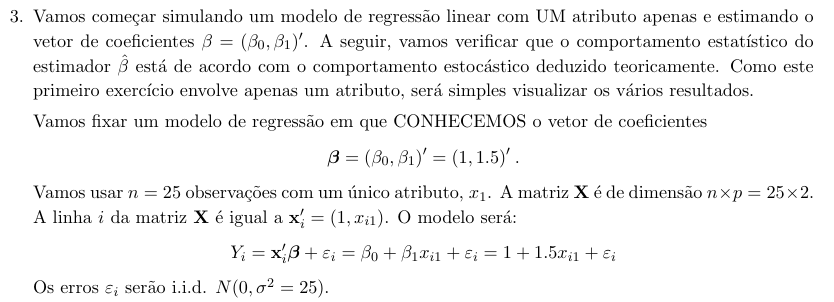

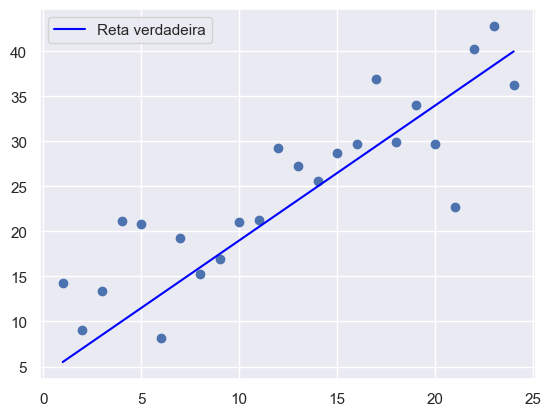

In [141]:
np.random.seed(0)

x1 = np.arange(1, 25)
beta = np.array([4, 1.5])
X = np.column_stack((np.ones_like(x1), x1))

mu = X @ beta
sigma = 5
epsilon = np.random.normal(0, sigma, size=24)

y = mu + epsilon

plt.scatter(x1, y)
plt.plot(x1, 4 + 1.5 * x1, color='blue', label='Reta verdadeira')
plt.legend()
plt.show()

Correlação: 0.8693269171474921
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     68.06
Date:                sex, 11 abr 2025   Prob (F-statistic):           3.53e-08
Time:                        23:09:11   Log-Likelihood:                -70.558
No. Observations:                  24   AIC:                             145.1
Df Residuals:                      22   BIC:                             147.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2153

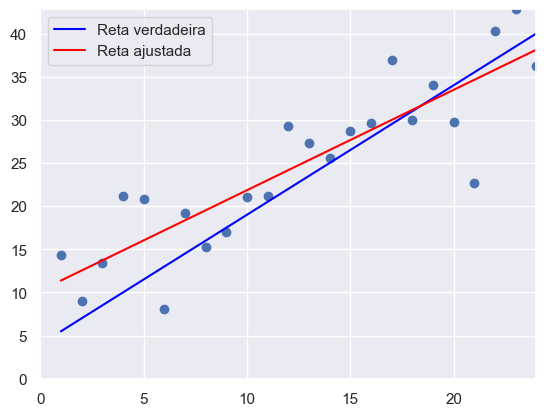

In [142]:
X_const = sm.add_constant(X)
sim1 = sm.OLS(y, X_const).fit()
beta_hat = sim1.params
print("Correlação:", np.corrcoef(y, x1)[0, 1])
print(sim1.summary())

plt.scatter(x1, y)
plt.xlim(0, max(x1))
plt.ylim(0, max(y))
plt.plot(x1, 4 + 1.5 * x1, color='blue', label='Reta verdadeira')
plt.plot(x1, beta_hat[0] + beta_hat[1] * x1, color='red', label='Reta ajustada')
plt.legend()
plt.show()

O ultimo gráfico mostra a diferença FUNDAMENTAL entre beta_hat previstos e beta do modelo conhecido. `beta_hat` é um vetor que é usado para ESTIMAR o valor verdadeiro de `beta` usando os 24 pontos. Na prática, não se sabe o valor verdadeiro de `beta` é por isso que são estimados usando amostras para inferir seu valor.

O erro de estimativa pode ser dado por:

`beta_hat` - `beta` = [10.2153, 1.1629] - [4, 1.5] = [6.2153, -0.3371]

Correlação: 0.8962832190207302
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     89.86
Date:                sex, 11 abr 2025   Prob (F-statistic):           3.16e-09
Time:                        23:09:11   Log-Likelihood:                -74.459
No. Observations:                  24   AIC:                             152.9
Df Residuals:                      22   BIC:                             155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8451

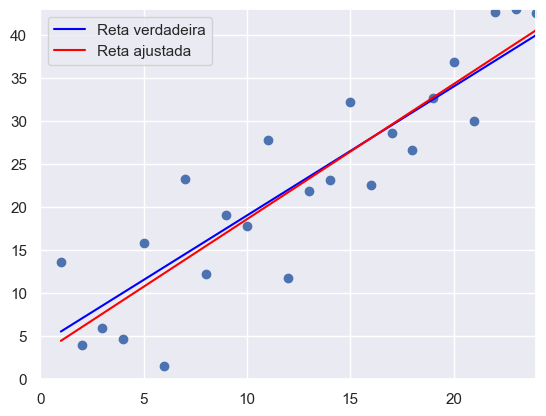

In [143]:
np.random.seed(1)

epsilon = np.random.normal(0, sigma, size=24)

y2 = mu + epsilon

sim2 = sm.OLS(y2, X_const).fit()
beta_hat2 = sim2.params
print("Correlação:", np.corrcoef(y2, x1)[0, 1])
print(sim2.summary())

plt.scatter(x1, y2)
plt.xlim(0, max(x1))
plt.ylim(0, max(y2))
plt.plot(x1, 4 + 1.5 * x1, color='blue', label='Reta verdadeira')
plt.plot(x1, beta_hat2[0] + beta_hat2[1] * x1, color='red', label='Reta ajustada')
plt.legend()
plt.show()

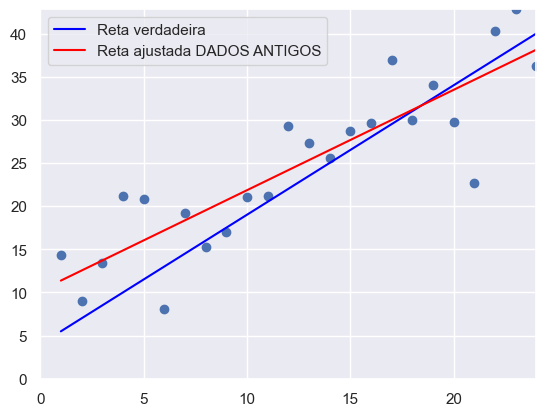

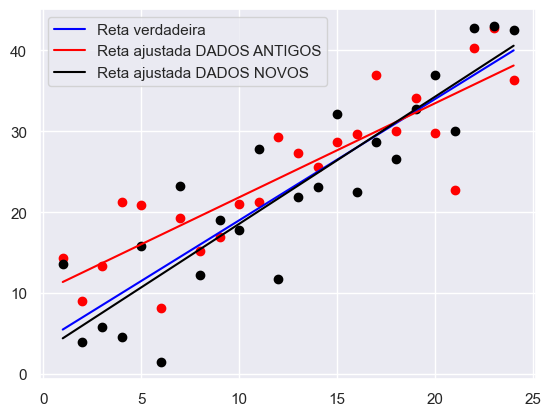

In [144]:
plt.scatter(x1, y)
plt.xlim(0, max(x1))
plt.ylim(0, max(y))
plt.plot(x1, 4 + 1.5 * x1, color='blue', label='Reta verdadeira')
plt.plot(x1, beta_hat[0] + beta_hat[1] * x1, color='red', label='Reta ajustada DADOS ANTIGOS')
plt.legend()
plt.show()

plt.scatter(x1, y, color="red")
plt.scatter(x1, y2, color="black")
plt.plot(x1, 4 + 1.5 * x1, color='blue', label='Reta verdadeira')
plt.plot(x1, beta_hat[0] + beta_hat[1] * x1, color='red', label='Reta ajustada DADOS ANTIGOS')
plt.plot(x1, beta_hat2[0] + beta_hat2[1] * x1, color='black', label='Reta ajustada DADOS NOVOS')
plt.legend()
plt.show()

Agora existem 3 retas distintas:
- *Verdadeira:* 4 + 1.5*x
- *Reta estimada com o primeiro conjunto de dados (seed=0):* 10.2153 + 1.1629*x
- *Reta estimada com o segundo conjunto de dados (seed=1):* 2.8451 + 1.5721*x

Onde o erro de estimativa do segundo conjunto de dados foi de `beta_hat2` - `beta` = [2.8451, 1.5721] - [4, 1.5] = [-1.1549, 0.0721]

Como o vetor `beta_hat` estimado pela forma matricial `beta_hat = ((XT * X)^-1) * (XT * Y)` é uma função dos dados aleatórios `Y`, ele próprio é um vetor aleatório. Para cada amostra, gerada sob o mesmo modelo probabilístico, temos diferentes valores para `beta_hat`. O erro de estimativa `beta_hat - beta` também é uma quantidade aleatória. Algumas vezes, este valor será pequeno, e outras grande. Deseja-se saber o que seria um erro grande na estimativa do valor de `beta` e com que frequência ele vai ocorrer. Em suma, deseja-se conhecer a *distribuição de probabilidade* do VETOR erro de estimação.

`beta_hat - beta = (beta_hat[0] - 4) - (beta_hat[1] - 1.5)`

Veja que a única parte aleatória nesse expressão é o `beta_hat` de mínimos quadrados já que `beta` é um vetor fixo. Para estudar o comportamento probabilístico do estimador `beta_hat` (ou do erro de estimação), pode-se usar a simulação *Monte Carlo*. Serão gerados centenas dos vetores `Y`, sempre nas mesmas condições, e verificar como o estimador `beta_hat` e o erro de estimação (`beta_hat - beta`) se comportam estatisticamente

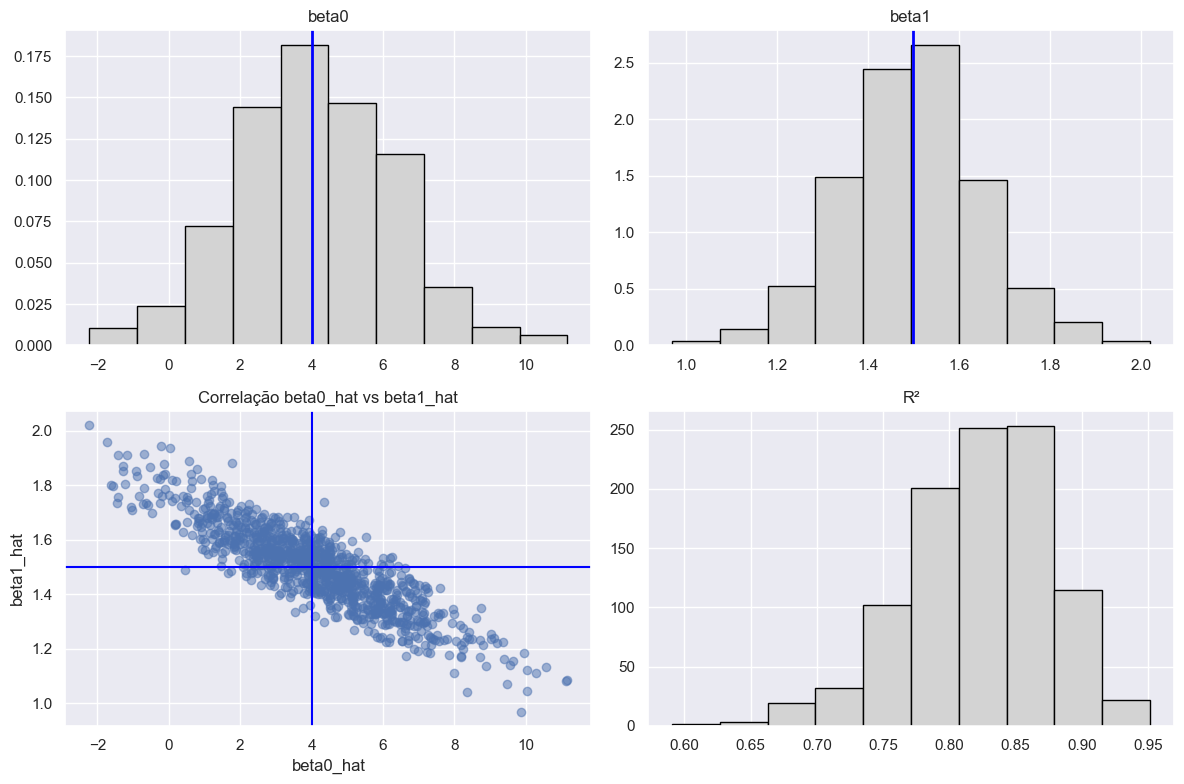

In [145]:
np.random.seed(1)

x1 = np.arange(1, 25)
beta = np.array([4, 1.5])
X = np.column_stack((np.ones_like(x1), x1))
X_const = sm.add_constant(X)

mu = X @ beta
sigma = 5

num_sim = 1000
beta_sims = np.zeros((2, num_sim))
R2 = np.zeros(num_sim)
SSE = np.zeros(num_sim)
S = np.zeros(num_sim)

for idx in range(num_sim):
    epsilon = np.random.normal(0, sigma, size=24)
    y = mu + epsilon
    simj = sm.OLS(y, X_const).fit()
    beta_sims[:, idx] = simj.params
    R2[idx] = simj.rsquared
    S[idx] = simj.mse_resid ** 0.5
    SSE[idx] = simj.ssr

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histograma do beta_0
axs[0, 0].hist(beta_sims[0, :], density=True, color='lightgray', edgecolor='black')
axs[0, 0].axvline(x=beta[0], color='blue', linewidth=2)
axs[0, 0].set_title("beta0")

axs[0, 1].hist(beta_sims[1, :], density=True, color='lightgray', edgecolor='black')
axs[0, 1].axvline(x=beta[1], color='blue', linewidth=2)
axs[0, 1].set_title("beta1")

axs[1, 0].scatter(beta_sims[0, :], beta_sims[1, :], alpha=0.5)
axs[1, 0].axvline(x=beta[0], color='blue')
axs[1, 0].axhline(y=beta[1], color='blue')
axs[1, 0].set_xlabel("beta0_hat")
axs[1, 0].set_ylabel("beta1_hat")
axs[1, 0].set_title("Correlação beta0_hat vs beta1_hat")

axs[1, 1].hist(R2, color='lightgray', edgecolor='black')
axs[1, 1].set_title("R²")

plt.tight_layout()
plt.show()

In [146]:
print(simj.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     140.5
Date:                sex, 11 abr 2025   Prob (F-statistic):           5.03e-11
Time:                        23:09:12   Log-Likelihood:                -68.122
No. Observations:                  24   AIC:                             140.2
Df Residuals:                      22   BIC:                             142.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1774      1.820      3.395      0.0

Não só a distribuição marginal de cada componente de `beta_hat` parece seguir uma distribuição gaussiana, mas observando o plot dos 1000 pares de pontos `beta0_hat` e `beta1_hat` tem um formato de uma elipse. Isso mostra que a distribuição conjunta das componentes segue uma gaussiana bivariada. A partir dos plots, nota-se que a correlação entre `beta0_hat` e `beta1_hat` é negativa. Quando a inclinação de `beta1_hat` fica acima da média (aproximadamente 1.5 de média), os valores de `beta0_hat` ficam menores, ficando a abaixo de sua média (aproximadamente 4.0)

Nota-se que a métrica R² também é uma variável aleatória. Ao longo das 1000 simulações, apresentando um valor médio de 0.8234.  50% de seus valores estão entre 0.79 e 0.86. Apenas 2.3% dos 1000 valores calculados foram menores que 0.7. Uma das amostras chegou a gerar um R2 igual a 0 60, o mínimo nas 1000 simulações.

Esse estudo estatístico permite analisar as propriedades do estimador de mínimos quadrados para o `beta_hat`. Contudo, esse tipo de estudo, na prática não é possível analisar, uma vez que não se sabe o valor real dos coeficientes `beta`. As únicas informações disponíveis são os dados X e Y.

Usando apenas os dados em mãos, é possível realizar o cálculo de probabilidades e fazer um estudo estatístico sobre o `beta_hat`, com uma única amostra será possível replicar os resultados na simulação acima.

`beta_hat` é composto por uma matriz de constantes `A = (XT * X)^-1 * X` multiplicado por um vetor gaussiano `Y`. Pode-se deduzir `beta_hat` como uma variável normal multivariada.

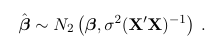

In [147]:
print(np.round(np.linalg.inv(X.T @ X), 4))

[[ 0.1775 -0.0109]
 [-0.0109  0.0009]]


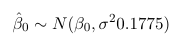

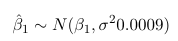

Agora só falta conhecer os valores de `sigma^2`, a variância dos erros epsilon. No problema acima foi setado como 5.0. Contudo, em um cenário real onde não se sabe esse valor e a única informação a dispor são os dados `X` e `Y`, deve-se obter uma aproximação de `sigma^2` de outra forma.

Utilizando os resíduos, obtidos por `r_i = y_hat_i - y_i`. E obtendo:

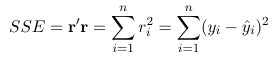

Sabe-se que a soma dos erros ao quadrado (Sum of Square Erros - SSE) segue uma distribuição Qui-Quadrado com n-p =  n-2 graus de liberdade multiplicada por `sigma^2`. Portanto, o `E(SSE) = sigma^2 * (n - p)`, consecutivamente, `S^2 = E(SSE) / (n - p) = sigma^2`. Isso é, o valor esperado da soma dos resíduos ao quadrado, dividida por n - p, é aproximadamente ao valor do `sigma^2` que se deseja encontrar.

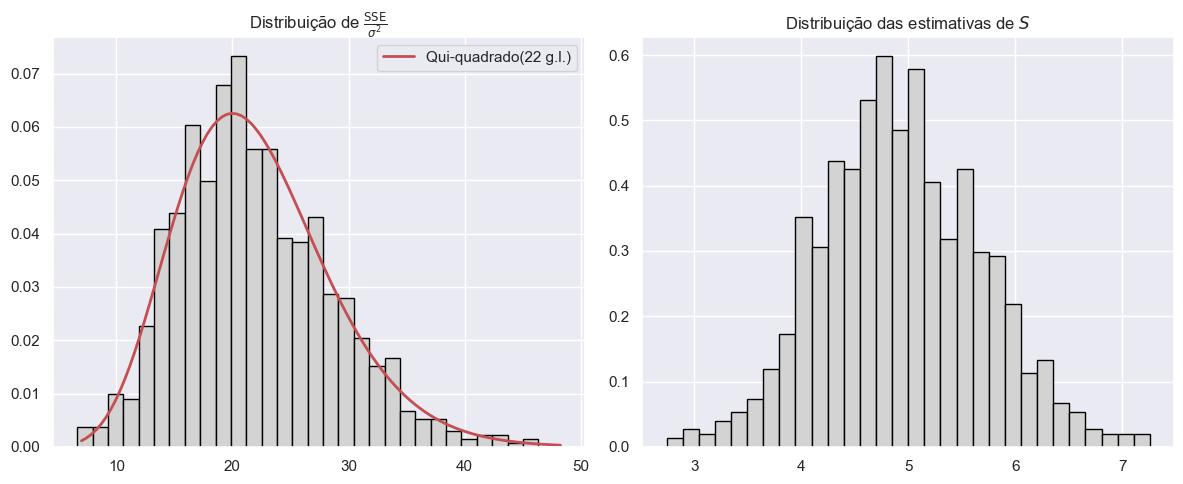

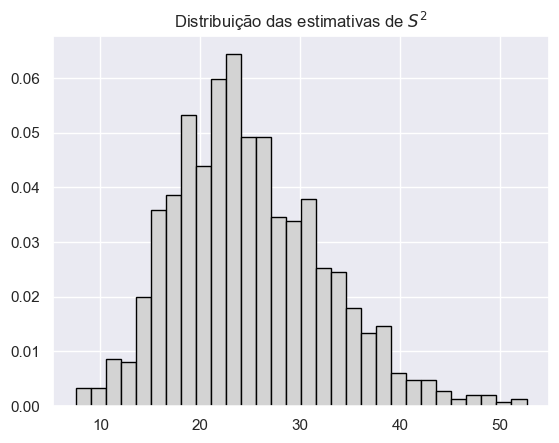

Proporção de simulações com S2 fora de [3, 7]: 0.80%


In [148]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
degrees_freedom = int(simj.df_resid)

axs[0].hist(SSE / (sigma ** 2), bins=30, density=True, color="lightgray", edgecolor="black")
x_vals = np.linspace(chi2.ppf(0.001, df=degrees_freedom), chi2.ppf(0.999, df=degrees_freedom), 100)
axs[0].plot(x_vals, chi2.pdf(x_vals, df=degrees_freedom), 'r-', lw=2, label=f"Qui-quadrado({degrees_freedom} g.l.)")
axs[0].set_title(r"Distribuição de $\frac{\text{SSE}}{\sigma^2}$")
axs[0].legend()

axs[1].hist(S, bins=30, density=True, color="lightgray", edgecolor="black")
axs[1].set_title(r"Distribuição das estimativas de $S$")

plt.tight_layout()
plt.show()

plt.figure()
plt.hist(S ** 2, bins=30, density=True, color="lightgray", edgecolor="black")
plt.title(r"Distribuição das estimativas de $S^2$")
plt.show()


proporcao_extremos = np.sum((S > 7) | (S < 3)) / num_sim
proporcao_extremos *= 100
print(f"Proporção de simulações com S2 fora de [3, 7]: {proporcao_extremos:.2f}%")

No final, ficou evidente que a maioria dos casos teve um valor de `S^2` entre 3 e 7, sendo apenas 0.80% deles indo além desses limites. Na prática, haveria apenas um conjunto de dados para fazer o ajuste (um entre as 1000 simulações) e se obtiver um valor de `S^2` próximo de `sigma=5.0`, seria um resultado excelente por ser próximo ao `sigma` real.

O ponto relevante é: Uma aproximação de `sigma` baseada em uma única amostra de dados, permite conhecer o comportamento estatístico dos coeficientes de `beta_hat` como se fosse feitas diversas simulações. Afinal, sabe-se que esses coeficientes são variáveis aleatórias como descritas anteriormente.

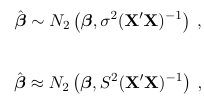

Com isso em mente, pode-se agora estimar o erro máximo ao estimar o modelo pelo método de mínimos quadrados, permitindo inclusive, traçar intervalos de confiança para os valores dos respectivos coeficientes e estudar o comportamento do modelo ajustado para o conjunto de dados.

## 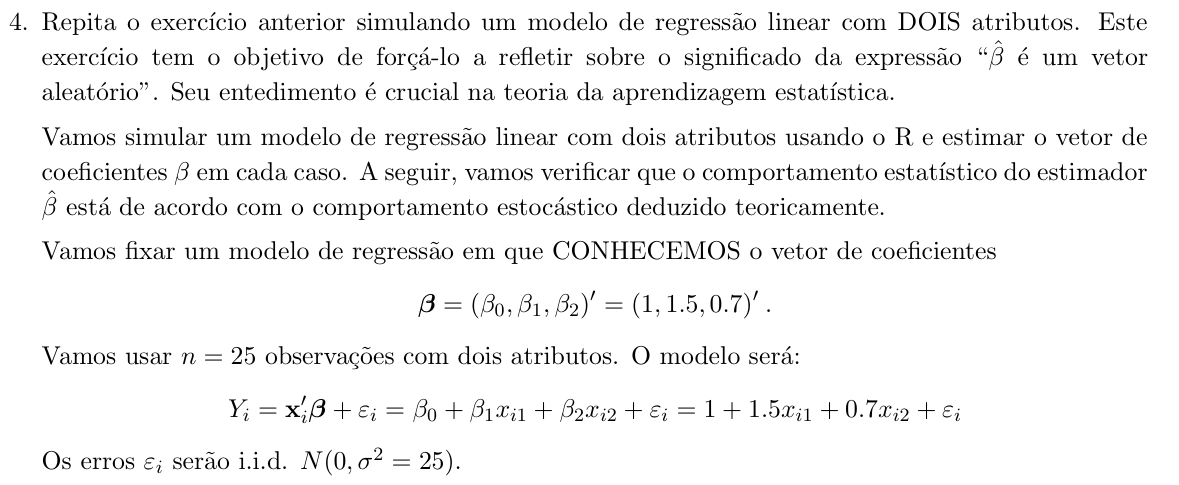

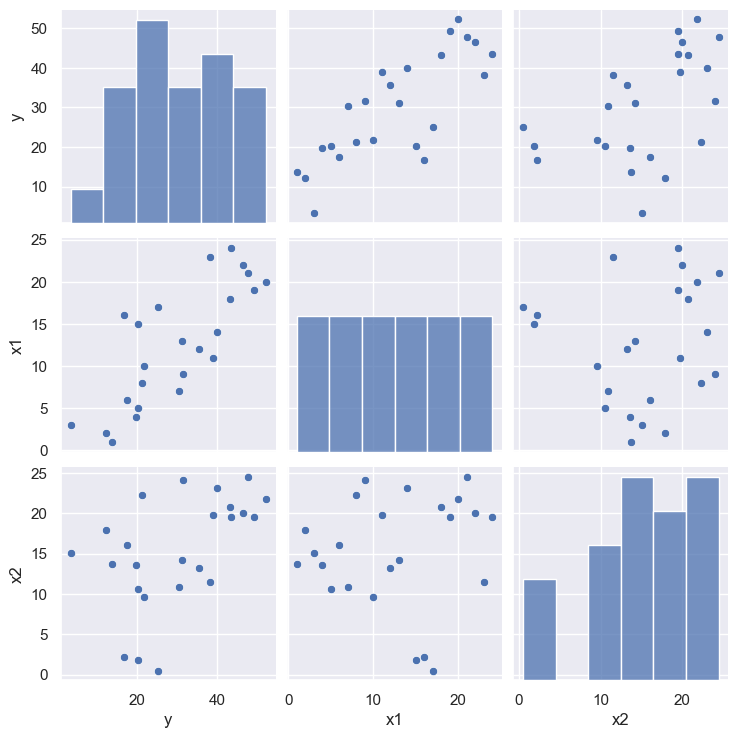

In [149]:
np.random.seed(0)

x1 = np.arange(1, 25)
x2 = np.round(25 * (np.random.uniform(size=24)), 1)

beta = np.array([1, 1.5, 0.7])
X = np.column_stack((np.ones_like(x1), x1, x2))

mu = X @ beta
sigma = 5
epsilon = np.random.normal(0, sigma, size=24)

y = mu + epsilon

X_df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})
sns.pairplot(X_df)
plt.show()

In [150]:
X_sm = sm.add_constant(X)
sim1 = sm.OLS(y, X_sm).fit()

print(sim1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     46.14
Date:                sex, 11 abr 2025   Prob (F-statistic):           2.06e-08
Time:                        23:09:13   Log-Likelihood:                -75.780
No. Observations:                  24   AIC:                             157.6
Df Residuals:                      21   BIC:                             161.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7391      3.643     -0.203      0.8

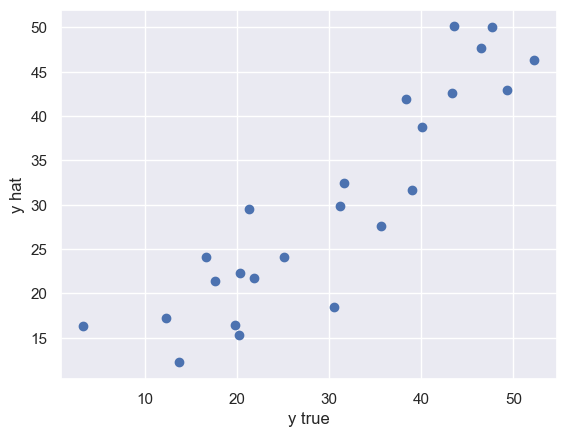

R² calculado manualmente: 0.8146
R² do summary: 0.8146


Residual standard error: 6.0819681803556636
Residual standard error (summary): 6.0820


matriz de convariância dos coeficientes:
[[ 1.32702931e+01 -3.56286092e-01 -4.76688152e-01]
 [-3.56286092e-01  3.24782079e-02 -3.25579077e-03]
 [-4.76688152e-01 -3.25579077e-03  3.38991343e-02]]
Desvios padrão dos betas (std. error):
 [3.64284135 0.18021711 0.18411718]
Valores do summary:
 [3.64284135 0.18021711 0.18411718]


In [151]:
beta_hat = sim1.params
y_hat = sim1.fittedvalues

plt.figure()
plt.scatter(y, y_hat)
plt.xlabel("y true")
plt.ylabel("y hat")
plt.show()

residuals_vector = y - y_hat
s2 = np.sum(residuals_vector * residuals_vector) / (len(y) - 3)
r2_manual = np.corrcoef(y_hat, y)[0, 1] ** 2
vcov = sim1.cov_params()
sdhat = np.sqrt(np.diag(vcov))

print(f"R² calculado manualmente: {r2_manual:.4f}")
print(f"R² do summary: {sim1.rsquared:.4f}")
print("\n")

print(f"Residual standard error: {np.sqrt(s2)}")
print(f"Residual standard error (summary): {sim1.mse_resid ** 0.5:.4f}")
print("\n")

print(f"matriz de convariância dos coeficientes:\n{vcov}")
print("Desvios padrão dos betas (std. error):\n", sdhat)
print("Valores do summary:\n", sim1.bse)

In [152]:
x1 = np.arange(1, 25)
x2 = np.round(25 * (np.random.uniform(size=24)), 1)
beta = np.array([1, 1.5, 0.7])
X = np.column_stack((np.ones_like(x1), x1, x2))
X_sm = sm.add_constant(X)
mu = X_sm @ beta
sigma = 5

num_sim = 1000
beta_sims = np.zeros((3, num_sim))
beta_sims[:, 0] = sim1.params

for idx in range(num_sim):
    np.random.seed(idx)

    epsilon = np.random.normal(0, sigma, size=24)
    y = mu + epsilon

    simj = sm.OLS(y, X_sm).fit()
    beta_sims[:, idx] = simj.params

XtX_inv = np.linalg.inv(X.T @ X)
sd_beta = sigma * np.sqrt(np.diag(XtX_inv))

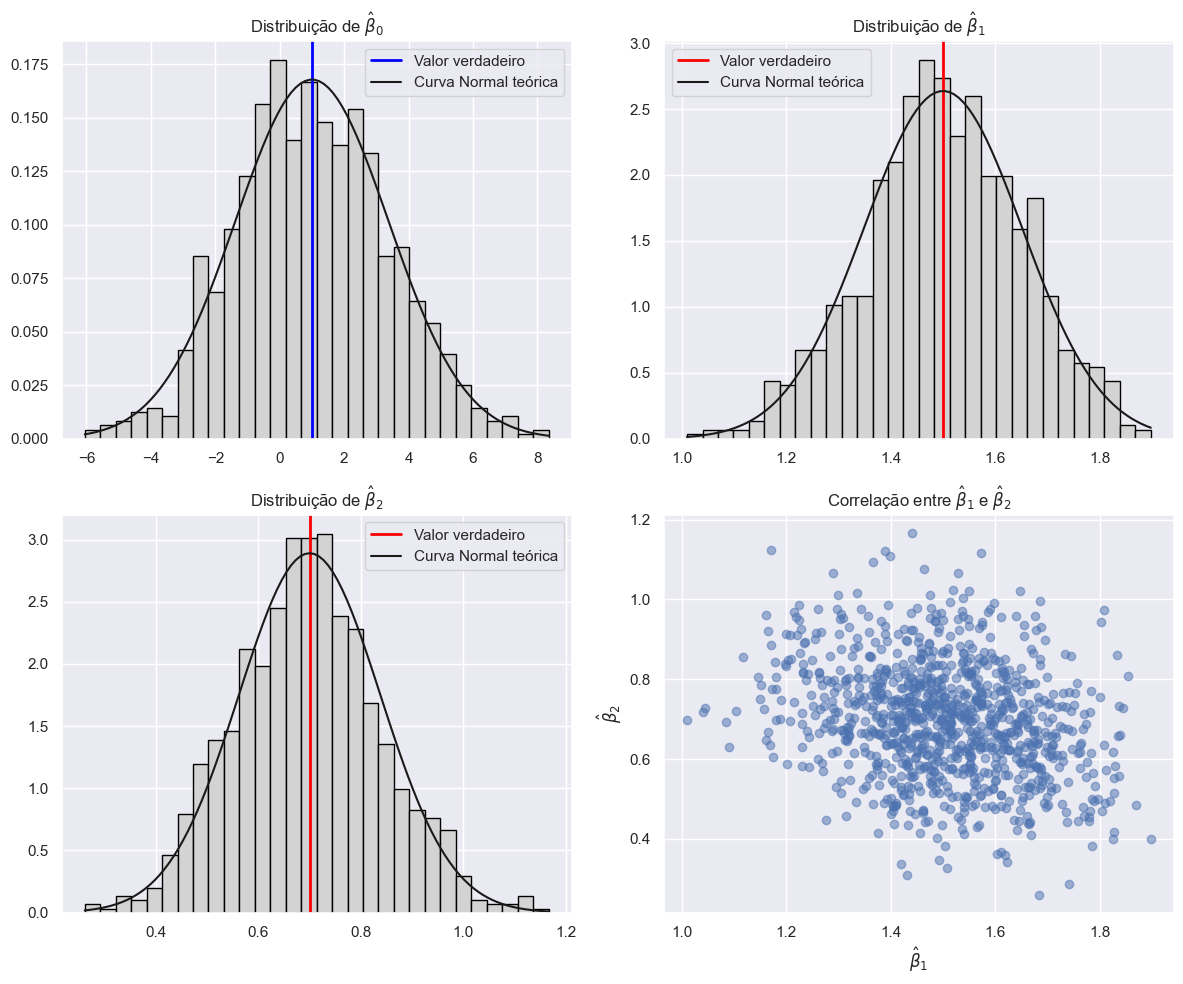

In [153]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

def plot_beta(ax, beta_vals, true_beta, sdb, titulo, cor='blue'):
    ax.hist(beta_vals, bins=30, density=True, color='lightgray', edgecolor='black')
    ax.axvline(true_beta, color=cor, linewidth=2, label="Valor verdadeiro")
    
    # Curva normal teórica
    x_vals = np.linspace(min(beta_vals), max(beta_vals), 100)
    y_vals = norm.pdf(x_vals, loc=true_beta, scale=sdb)
    ax.plot(x_vals, y_vals, 'k-', label='Curva Normal teórica')
    
    ax.set_title(titulo)
    ax.legend()

plot_beta(axs[0, 0], beta_sims[0, :], beta[0], sd_beta[0], r"Distribuição de $\hat{\beta}_0$")
plot_beta(axs[0, 1], beta_sims[1, :], beta[1], sd_beta[1], r"Distribuição de $\hat{\beta}_1$", cor='red')
plot_beta(axs[1, 0], beta_sims[2, :], beta[2], sd_beta[2], r"Distribuição de $\hat{\beta}_2$", cor='red')

axs[1, 1].scatter(beta_sims[1, :], beta_sims[2, :], alpha=0.5)
axs[1, 1].set_xlabel(r"$\hat{\beta}_1$")
axs[1, 1].set_ylabel(r"$\hat{\beta}_2$")
axs[1, 1].set_title(r"Correlação entre $\hat{\beta}_1$ e $\hat{\beta}_2$")

plt.tight_layout()
plt.show()


## 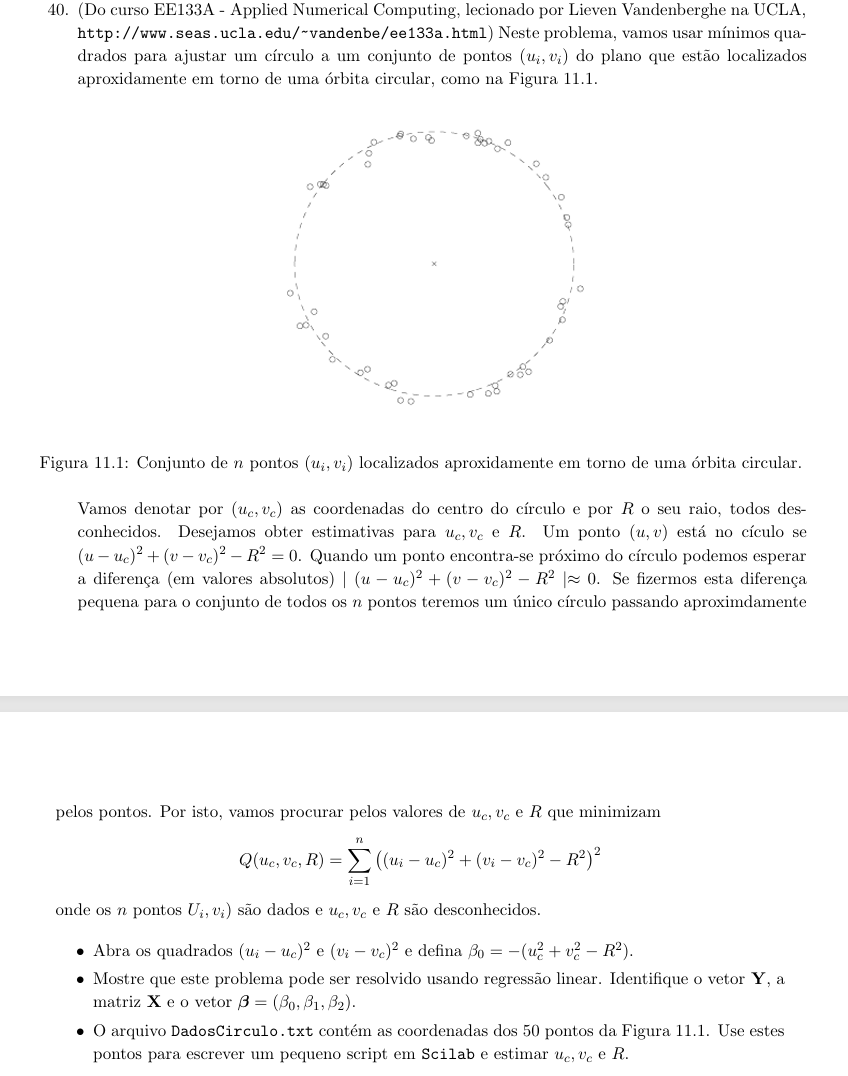

u         v
0  -3.926531  5.799225
1  -3.171616  7.313062
2  -1.611599  7.559243
3  -2.667940  7.691135
4  -1.729971  5.511308
5  -2.218502  7.744210
6  -2.061850  7.709185
7  -1.477450  6.054910
8  -3.209541  7.517087
9  -2.013939  7.604547
10 -2.096539  5.135421
11 -2.841485  5.067184
12 -3.551632  7.391073
13 -2.332501  7.694923
14 -1.688935  5.346929
15 -1.493715  7.347366
16 -1.310394  6.871547
17 -1.308242  6.784201
18 -1.522137  5.728363
19 -1.862180  7.763315
20 -2.878418  7.767726
21 -3.305835  5.477886
22 -2.941814  5.069028
23 -3.568931  5.524619
24 -3.271566  7.677232
25 -1.816783  5.318141
26 -2.616099  7.614868
27 -3.636930  7.352473
28 -3.609496  6.030346
29 -3.821390  5.847699
30 -3.563920  5.847925
31 -2.966715  5.323726
32 -1.947322  5.170380
33 -3.047069  5.424598
34 -2.895587  7.799180
35 -3.202969  5.573401
36 -2.268896  7.870537
37 -2.321299  5.161793
38 -1.158515  6.157901
39 -1.899345  5.406764
40 -3.577179  7.244580
41 -2.647323  7.680523
42 -1.469948  6.118028
43 -3.797893  7.369148
44 -2.096834  7.646388
45 -4.011844  6.147951
46 -2.241591  7.741435
47 -1.373745  7.205447
48 -2.093594  5.238570
49 -1.426049  5.859428

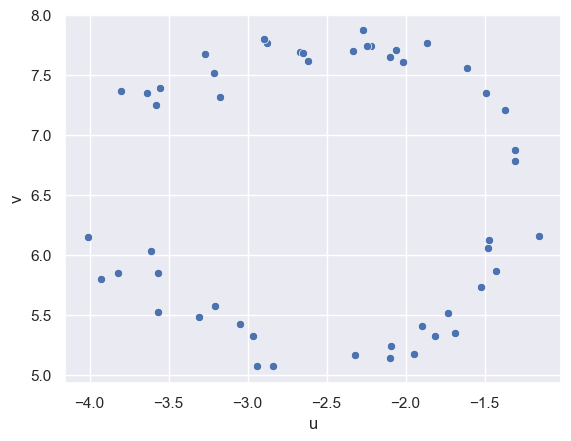

In [159]:
display(circle_df)

plt.figure()
sns.scatterplot(x=circle_df["u"], y=circle_df["v"])
plt.show()

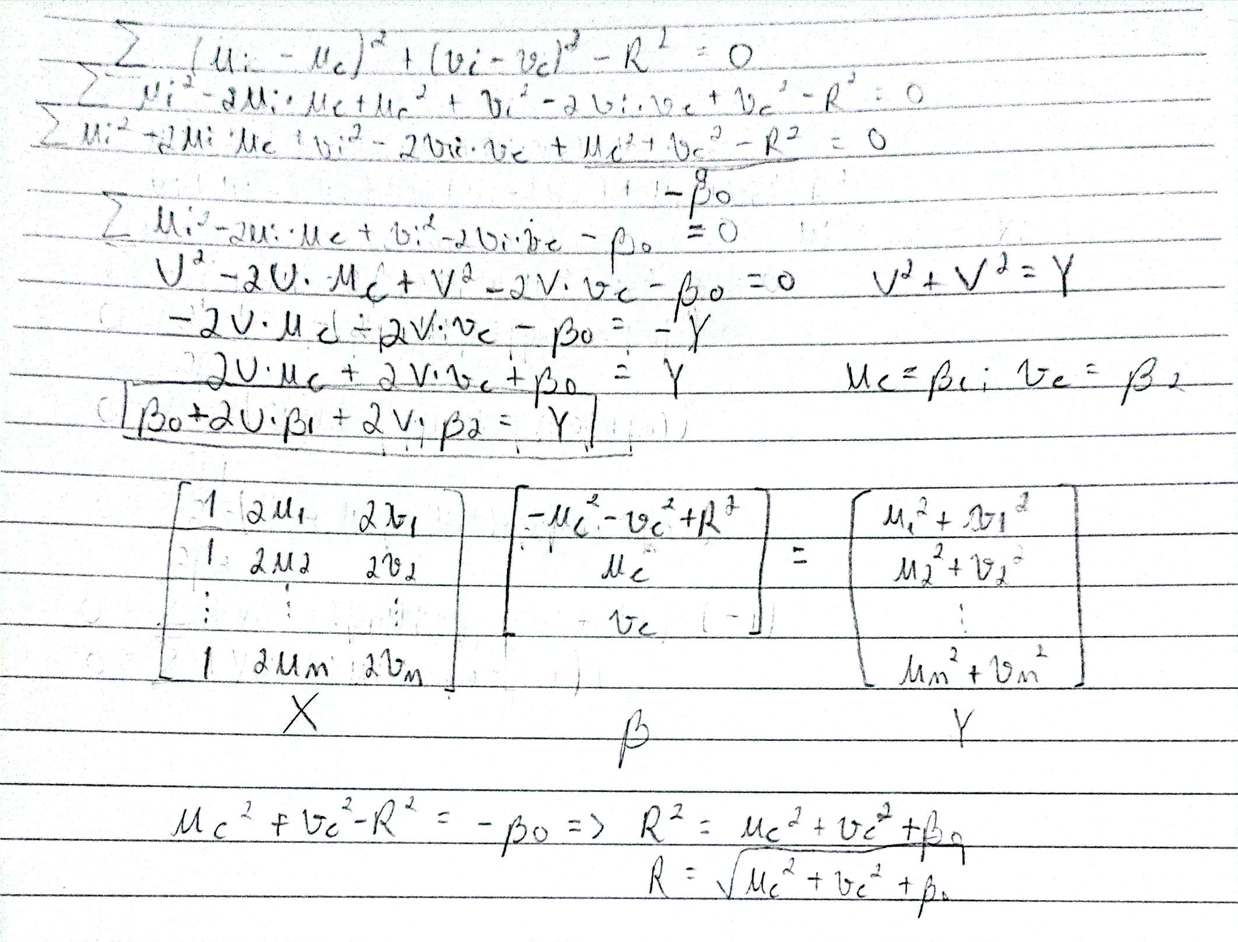

In [160]:
x1 = 2 * (circle_df["u"].values)
x2 = 2 * (circle_df["v"].values)

X_df = pd.DataFrame({"ones": np.ones_like(x1), "2U": x1, "2V": x2})
y = circle_df["u"].pow(2) + circle_df["v"].pow(2)
y.name = "u_c^2 + v_c^2"
display(X_df)
display(y)

ones        2U         2V
0    1.0 -7.853061  11.598450
1    1.0 -6.343232  14.626124
2    1.0 -3.223198  15.118487
3    1.0 -5.335880  15.382270
4    1.0 -3.459943  11.022616
5    1.0 -4.437004  15.488420
6    1.0 -4.123700  15.418370
7    1.0 -2.954900  12.109821
8    1.0 -6.419082  15.034175
9    1.0 -4.027877  15.209095
10   1.0 -4.193079  10.270842
11   1.0 -5.682970  10.134369
12   1.0 -7.103264  14.782146
13   1.0 -4.665001  15.389845
14   1.0 -3.377869  10.693857
15   1.0 -2.987431  14.694733
16   1.0 -2.620789  13.743094
17   1.0 -2.616485  13.568402
18   1.0 -3.044274  11.456726
19   1.0 -3.724359  15.526630
20   1.0 -5.756837  15.535452
21   1.0 -6.611670  10.955771
22   1.0 -5.883627  10.138057
23   1.0 -7.137861  11.049238
24   1.0 -6.543131  15.354464
25   1.0 -3.633566  10.636281
26   1.0 -5.232197  15.229736
27   1.0 -7.273860  14.704946
28   1.0 -7.218992  12.060691
29   1.0 -7.642780  11.695398
30   1.0 -7.127839  11.695851
31   1.0 -5.933430  10.647452
32   1.0 -3.894644  10.340761
33   1.0 -6.094138  10.849196
34   1.0 -5.791175  15.598359
35   1.0 -6.405938  11.146801
36   1.0 -4.537793  15.741073
37   1.0 -4.642598  10.323585
38   1.0 -2.317031  12.315803
39   1.0 -3.798691  10.813528
40   1.0 -7.154358  14.489161
41   1.0 -5.294646  15.361047
42   1.0 -2.939896  12.236055
43   1.0 -7.595785  14.738295
44   1.0 -4.193669  15.292776
45   1.0 -8.023688  12.295902
46   1.0 -4.483181  15.482870
47   1.0 -2.747491  14.410895
48   1.0 -4.187187  10.477140
49   1.0 -2.852098  11.718857

0     49.048655
1     63.540024
2     59.739411
3     66.271457
4     33.367316
5     64.894540
6     63.682757
7     38.844798
8     66.807757
9     61.885088
10    30.768028
11    33.750394
12    67.242054
13    64.652392
14    31.442145
15    56.214979
16    48.935293
17    47.736884
18    35.131044
19    63.736770
20    68.622862
21    40.935777
22    34.349317
23    43.258680
24    69.643030
25    31.583321
26    64.830186
27    67.286118
28    49.393528
29    48.798607
30    46.899754
31    37.143457
32    30.524897
33    38.710895
34    69.211628
35    41.321807
36    67.093237
37    32.032533
38    39.261906
39    32.840609
40    65.280155
41    65.998757
42    39.591009
43    68.728324
44    62.863964
45    53.892194
46    64.954542
47    53.805647
48    31.825748
49    36.366516
Name: u_c^2 + v_c^2, dtype: float64

In [161]:
X_sm = sm.add_constant(X_df)
sim1 = sm.OLS(y, X_sm).fit()

print(sim1.summary())

                            OLS Regression Results                            
Dep. Variable:          u_c^2 + v_c^2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.245e+04
Date:                sex, 11 abr 2025   Prob (F-statistic):           2.00e-79
Time:                        23:10:32   Log-Likelihood:                -9.8181
No. Observations:                  50   AIC:                             25.64
Df Residuals:                      47   BIC:                             31.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones         -46.6798      0.307   -152.213      0.0

ones   -46.679801
2U      -2.567143
2V       6.468049
dtype: float64
u_c = -2.567143361562309
u_c = 6.468049116198561
R = 1.3213945145195283


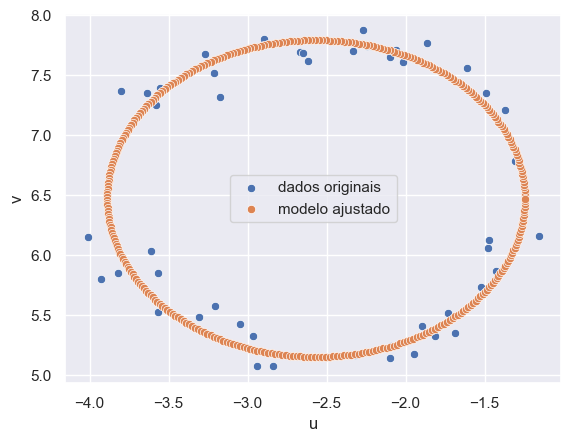

In [162]:
beta_hat = sim1.params
print(beta_hat)

uc = beta_hat["2U"]
vc = beta_hat["2V"]
r = np.sqrt(beta_hat["ones"] + np.pow(uc, 2) + np.pow(vc, 2))
print(f"u_c = {uc}\nu_c = {vc}\nR = {r}")

theta_array = np.linspace(0, 2*np.pi, 360)
u_model = r * np.cos(theta_array) + uc
v_model = r * np.sin(theta_array) + vc

plt.figure()
sns.scatterplot(x=circle_df["u"], y=circle_df["v"])
sns.scatterplot(x=u_model, y=v_model)
plt.legend(["dados originais", "modelo ajustado"])
plt.show()